In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
# DECEPTION detection
# Tune parameters on the whole dataset - using LOSO
######################################################################################
    
import itertools
import numpy as np
import glob
import csv
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

seed1 = 11
seed2 = 97
seed3 = 3
int_SIDs = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
SIDs = ['{:02d}'.format(s) for s in int_SIDs]
C_range = 2. ** np.arange(-30, 15, step=1.)
parameters = [{'C': C_range}]

eds = np.linspace(1.,4.,7) # Epoch delay
mels = np.linspace(0.5,4.5,9) # Max epoch length
feature_type = 'deception'
val_scores = []  # for each subject(key), list of tuples (ed,mel,bestC,outer_fold, val_acc)

for i, ed in enumerate(eds):
    for j, mel in enumerate(mels):
        for C in C_range:

            t = time.time()
            data = np.loadtxt('./../Experiment/ExtractedFeatures/features_'+feature_type+'_u_'+str(i)+'_'+str(j)+'.csv', 
                              delimiter=",", skiprows=0, dtype=str)   
            SIDs_all = data[:,0]
            X = data[:,1:-2].astype(np.float32)
            y = data[:,-1].astype(np.int)

            r = []
            # Outer CV - 2 min
            for SID in SIDs:
    #             print "Subject ", SID, ": "
                X_test = np.array([features for subject, features in zip(SIDs_all, X) if subject == SID])
                y_test = np.array([label for subject, label in zip(SIDs_all, y) if subject == SID])
                X_train = np.array([features for subject, features in zip(SIDs_all, X) if subject != SID])
                y_train = np.array([label for subject, label in zip(SIDs_all, y) if subject != SID])
                # Balance the dataset
                X_train, y_train = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X_train, y_train)
                X_test, y_test = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X_test, y_test)

                clf = LinearSVC(C=C)
                clf.fit(X_train, y_train)
                r.append( accuracy_score(y_test, clf.predict(X_test)) )

            val_scores.append( (ed, mel, C, np.mean(r)) )
#             print time.time()-t
print val_scores

KeyboardInterrupt: 

Max val acc:  0.541279491267 at (3.0, 1.0, 8.0, 0.5412794912671177)


<IPython.core.display.Javascript object>


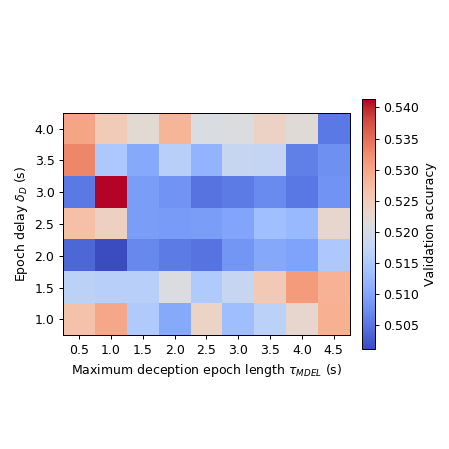

In [125]:
# Saved scores from above
val_scores = [(1.0, 0.5, 9.3132257461547852e-10, 0.5), (1.0, 0.5, 1.862645149230957e-09, 0.5), (1.0, 0.5, 3.7252902984619141e-09, 0.5), (1.0, 0.5, 7.4505805969238281e-09, 0.5), (1.0, 0.5, 1.4901161193847656e-08, 0.5), (1.0, 0.5, 2.9802322387695312e-08, 0.5), (1.0, 0.5, 5.9604644775390625e-08, 0.5), (1.0, 0.5, 1.1920928955078125e-07, 0.5), (1.0, 0.5, 2.384185791015625e-07, 0.5), (1.0, 0.5, 4.76837158203125e-07, 0.5), (1.0, 0.5, 9.5367431640625e-07, 0.5), (1.0, 0.5, 1.9073486328125e-06, 0.5), (1.0, 0.5, 3.814697265625e-06, 0.5), (1.0, 0.5, 7.62939453125e-06, 0.5), (1.0, 0.5, 1.52587890625e-05, 0.5), (1.0, 0.5, 3.0517578125e-05, 0.5), (1.0, 0.5, 6.103515625e-05, 0.5), (1.0, 0.5, 0.0001220703125, 0.50032894736842104), (1.0, 0.5, 0.000244140625, 0.49683081077899854), (1.0, 0.5, 0.00048828125, 0.50188668235127809), (1.0, 0.5, 0.0009765625, 0.50541169750246784), (1.0, 0.5, 0.001953125, 0.52470944757964311), (1.0, 0.5, 0.00390625, 0.51772022824653763), (1.0, 0.5, 0.0078125, 0.52133723968367374), (1.0, 0.5, 0.015625, 0.51931990775412595), (1.0, 0.5, 0.03125, 0.51599190390331773), (1.0, 0.5, 0.0625, 0.52630665939654253), (1.0, 0.5, 0.125, 0.52438303686880061), (1.0, 0.5, 0.25, 0.52411483105484491), (1.0, 0.5, 0.5, 0.5256562713177525), (1.0, 0.5, 1.0, 0.52655470175511954), (1.0, 0.5, 2.0, 0.52206065609585672), (1.0, 0.5, 4.0, 0.51648450682393199), (1.0, 0.5, 8.0, 0.51904569989460869), (1.0, 0.5, 16.0, 0.52100423901352988), (1.0, 0.5, 32.0, 0.51172945342080001), (1.0, 0.5, 64.0, 0.50347465348159337), (1.0, 0.5, 128.0, 0.49008656414806318), (1.0, 0.5, 256.0, 0.50356359649122806), (1.0, 0.5, 512.0, 0.50064102564102564), (1.0, 0.5, 1024.0, 0.5), (1.0, 0.5, 2048.0, 0.49780701754385959), (1.0, 0.5, 4096.0, 0.5), (1.0, 0.5, 8192.0, 0.50307017543859656), (1.0, 0.5, 16384.0, 0.5), (1.0, 1.0, 9.3132257461547852e-10, 0.49744260744215457), (1.0, 1.0, 1.862645149230957e-09, 0.49744260744215457), (1.0, 1.0, 3.7252902984619141e-09, 0.49744260744215457), (1.0, 1.0, 7.4505805969238281e-09, 0.49744260744215457), (1.0, 1.0, 1.4901161193847656e-08, 0.49744260744215457), (1.0, 1.0, 2.9802322387695312e-08, 0.49744260744215457), (1.0, 1.0, 5.9604644775390625e-08, 0.49744260744215457), (1.0, 1.0, 1.1920928955078125e-07, 0.49744260744215457), (1.0, 1.0, 2.384185791015625e-07, 0.49744260744215457), (1.0, 1.0, 4.76837158203125e-07, 0.49744260744215457), (1.0, 1.0, 9.5367431640625e-07, 0.49744260744215457), (1.0, 1.0, 1.9073486328125e-06, 0.49827762768506956), (1.0, 1.0, 3.814697265625e-06, 0.49333175235845522), (1.0, 1.0, 7.62939453125e-06, 0.49464754183213933), (1.0, 1.0, 1.52587890625e-05, 0.49219631864323421), (1.0, 1.0, 3.0517578125e-05, 0.49851426038390834), (1.0, 1.0, 6.103515625e-05, 0.50404914802788403), (1.0, 1.0, 0.0001220703125, 0.49208827030026309), (1.0, 1.0, 0.000244140625, 0.48540687166337521), (1.0, 1.0, 0.00048828125, 0.49928698936442251), (1.0, 1.0, 0.0009765625, 0.51694017222197197), (1.0, 1.0, 0.001953125, 0.50663653548824161), (1.0, 1.0, 0.00390625, 0.52006643229328064), (1.0, 1.0, 0.0078125, 0.50640538960179871), (1.0, 1.0, 0.015625, 0.51016029765299598), (1.0, 1.0, 0.03125, 0.50901831349977023), (1.0, 1.0, 0.0625, 0.50957452026862382), (1.0, 1.0, 0.125, 0.52226137146297835), (1.0, 1.0, 0.25, 0.52834578139445887), (1.0, 1.0, 0.5, 0.52959346683633646), (1.0, 1.0, 1.0, 0.52678163387794252), (1.0, 1.0, 2.0, 0.52675722732255748), (1.0, 1.0, 4.0, 0.52976912119799369), (1.0, 1.0, 8.0, 0.52356433640592048), (1.0, 1.0, 16.0, 0.5189577669911366), (1.0, 1.0, 32.0, 0.51423677021446101), (1.0, 1.0, 64.0, 0.51956365397120374), (1.0, 1.0, 128.0, 0.49484376222447968), (1.0, 1.0, 256.0, 0.50400367472735896), (1.0, 1.0, 512.0, 0.49856563647490815), (1.0, 1.0, 1024.0, 0.50043859649122802), (1.0, 1.0, 2048.0, 0.49949392712550605), (1.0, 1.0, 4096.0, 0.5), (1.0, 1.0, 8192.0, 0.49934210526315792), (1.0, 1.0, 16384.0, 0.49851973684210532), (1.0, 1.5, 9.3132257461547852e-10, 0.49289515387619104), (1.0, 1.5, 1.862645149230957e-09, 0.49289515387619104), (1.0, 1.5, 3.7252902984619141e-09, 0.49289515387619104), (1.0, 1.5, 7.4505805969238281e-09, 0.49289515387619104), (1.0, 1.5, 1.4901161193847656e-08, 0.49289515387619104), (1.0, 1.5, 2.9802322387695312e-08, 0.49289515387619104), (1.0, 1.5, 5.9604644775390625e-08, 0.49289515387619104), (1.0, 1.5, 1.1920928955078125e-07, 0.49289515387619104), (1.0, 1.5, 2.384185791015625e-07, 0.49289515387619104), (1.0, 1.5, 4.76837158203125e-07, 0.49289515387619104), (1.0, 1.5, 9.5367431640625e-07, 0.49289515387619104), (1.0, 1.5, 1.9073486328125e-06, 0.49333375036741911), (1.0, 1.5, 3.814697265625e-06, 0.49318192850507098), (1.0, 1.5, 7.62939453125e-06, 0.49303010664272273), (1.0, 1.5, 1.52587890625e-05, 0.49282599058334348), (1.0, 1.5, 3.0517578125e-05, 0.49859175687925056), (1.0, 1.5, 6.103515625e-05, 0.50158594548007929), (1.0, 1.5, 0.0001220703125, 0.51528758789576279), (1.0, 1.5, 0.000244140625, 0.49615688359257532), (1.0, 1.5, 0.00048828125, 0.4957584874154678), (1.0, 1.5, 0.0009765625, 0.49629427450187474), (1.0, 1.5, 0.001953125, 0.49991046664186317), (1.0, 1.5, 0.00390625, 0.51007786062833449), (1.0, 1.5, 0.0078125, 0.50723498254308907), (1.0, 1.5, 0.015625, 0.50054052823159068), (1.0, 1.5, 0.03125, 0.50260387542260176), (1.0, 1.5, 0.0625, 0.50026839547007784), (1.0, 1.5, 0.125, 0.49885183388958171), (1.0, 1.5, 0.25, 0.4988667680008782), (1.0, 1.5, 0.5, 0.49945966133465458), (1.0, 1.5, 1.0, 0.49338207918608101), (1.0, 1.5, 2.0, 0.49341558441695249), (1.0, 1.5, 4.0, 0.49573414768514029), (1.0, 1.5, 8.0, 0.49542928397811881), (1.0, 1.5, 16.0, 0.49870470446193665), (1.0, 1.5, 32.0, 0.49618735893466248), (1.0, 1.5, 64.0, 0.50007329888610108), (1.0, 1.5, 128.0, 0.48393321585124838), (1.0, 1.5, 256.0, 0.49481424148606817), (1.0, 1.5, 512.0, 0.50361633470568601), (1.0, 1.5, 1024.0, 0.49789903079376768), (1.0, 1.5, 2048.0, 0.49987868607689434), (1.0, 1.5, 4096.0, 0.50518341307814996), (1.0, 1.5, 8192.0, 0.5), (1.0, 1.5, 16384.0, 0.49928876244665715), (1.0, 2.0, 9.3132257461547852e-10, 0.50580613548316211), (1.0, 2.0, 1.862645149230957e-09, 0.50580613548316211), (1.0, 2.0, 3.7252902984619141e-09, 0.50580613548316211), (1.0, 2.0, 7.4505805969238281e-09, 0.50580613548316211), (1.0, 2.0, 1.4901161193847656e-08, 0.50580613548316211), (1.0, 2.0, 2.9802322387695312e-08, 0.50580613548316211), (1.0, 2.0, 5.9604644775390625e-08, 0.50580613548316211), (1.0, 2.0, 1.1920928955078125e-07, 0.50580613548316211), (1.0, 2.0, 2.384185791015625e-07, 0.50784560916737265), (1.0, 2.0, 4.76837158203125e-07, 0.50580613548316211), (1.0, 2.0, 9.5367431640625e-07, 0.50405174951824983), (1.0, 2.0, 1.9073486328125e-06, 0.50526885478140782), (1.0, 2.0, 3.814697265625e-06, 0.50526885478140782), (1.0, 2.0, 7.62939453125e-06, 0.50661835749889972), (1.0, 2.0, 1.52587890625e-05, 0.50775254027007932), (1.0, 2.0, 3.0517578125e-05, 0.50053438810516537), (1.0, 2.0, 6.103515625e-05, 0.49321958502379626), (1.0, 2.0, 0.0001220703125, 0.50330064544429687), (1.0, 2.0, 0.000244140625, 0.50188251075150137), (1.0, 2.0, 0.00048828125, 0.50229644125948913), (1.0, 2.0, 0.0009765625, 0.50962266239322329), (1.0, 2.0, 0.001953125, 0.50601763125253263), (1.0, 2.0, 0.00390625, 0.50372315445147686), (1.0, 2.0, 0.0078125, 0.50198086828338317), (1.0, 2.0, 0.015625, 0.50830769520803187), (1.0, 2.0, 0.03125, 0.51052791195210889), (1.0, 2.0, 0.0625, 0.50349271586911681), (1.0, 2.0, 0.125, 0.49086119213721607), (1.0, 2.0, 0.25, 0.48821007698951813), (1.0, 2.0, 0.5, 0.49001302504606536), (1.0, 2.0, 1.0, 0.49056797159954818), (1.0, 2.0, 2.0, 0.48285536036337512), (1.0, 2.0, 4.0, 0.48344529454999258), (1.0, 2.0, 8.0, 0.47856095527827125), (1.0, 2.0, 16.0, 0.47677545152736028), (1.0, 2.0, 32.0, 0.47812776875014479), (1.0, 2.0, 64.0, 0.49390718421879781), (1.0, 2.0, 128.0, 0.50447172382404115), (1.0, 2.0, 256.0, 0.50626057930404289), (1.0, 2.0, 512.0, 0.49796552978927511), (1.0, 2.0, 1024.0, 0.50173209087300263), (1.0, 2.0, 2048.0, 0.49609853121175024), (1.0, 2.0, 4096.0, 0.50178491072071418), (1.0, 2.0, 8192.0, 0.50108334902551543), (1.0, 2.0, 16384.0, 0.49472863551810914), (1.0, 2.5, 9.3132257461547852e-10, 0.52376200415363605), (1.0, 2.5, 1.862645149230957e-09, 0.52376200415363605), (1.0, 2.5, 3.7252902984619141e-09, 0.52376200415363605), (1.0, 2.5, 7.4505805969238281e-09, 0.52376200415363605), (1.0, 2.5, 1.4901161193847656e-08, 0.52376200415363605), (1.0, 2.5, 2.9802322387695312e-08, 0.52376200415363605), (1.0, 2.5, 5.9604644775390625e-08, 0.52315000904959685), (1.0, 2.5, 1.1920928955078125e-07, 0.52243877149625395), (1.0, 2.5, 2.384185791015625e-07, 0.5222728160671406), (1.0, 2.5, 4.76837158203125e-07, 0.52315000904959685), (1.0, 2.5, 9.5367431640625e-07, 0.52315000904959685), (1.0, 2.5, 1.9073486328125e-06, 0.52315000904959685), (1.0, 2.5, 3.814697265625e-06, 0.52192376284796616), (1.0, 2.5, 7.62939453125e-06, 0.52264099711009193), (1.0, 2.5, 1.52587890625e-05, 0.51000857591932069), (1.0, 2.5, 3.0517578125e-05, 0.51590526653449376), (1.0, 2.5, 6.103515625e-05, 0.51559196984132949), (1.0, 2.5, 0.0001220703125, 0.50773791577093286), (1.0, 2.5, 0.000244140625, 0.49425062524778313), (1.0, 2.5, 0.00048828125, 0.51279019472141296), (1.0, 2.5, 0.0009765625, 0.51348312713329969), (1.0, 2.5, 0.001953125, 0.51923026021893537), (1.0, 2.5, 0.00390625, 0.5143388347504767), (1.0, 2.5, 0.0078125, 0.51639291377387786), (1.0, 2.5, 0.015625, 0.51883744466218318), (1.0, 2.5, 0.03125, 0.52000401198606294), (1.0, 2.5, 0.0625, 0.51542633988557673), (1.0, 2.5, 0.125, 0.50428926041190536), (1.0, 2.5, 0.25, 0.5040809341856981), (1.0, 2.5, 0.5, 0.50427095003076805), (1.0, 2.5, 1.0, 0.5018639149662234), (1.0, 2.5, 2.0, 0.49696333563938949), (1.0, 2.5, 4.0, 0.50057388785445711), (1.0, 2.5, 8.0, 0.49459953079992441), (1.0, 2.5, 16.0, 0.50138756640567661), (1.0, 2.5, 32.0, 0.50679338067525126), (1.0, 2.5, 64.0, 0.50358671312333503), (1.0, 2.5, 128.0, 0.50772273743996055), (1.0, 2.5, 256.0, 0.50021781650071129), (1.0, 2.5, 512.0, 0.50228663625236458), (1.0, 2.5, 1024.0, 0.49983404457088665), (1.0, 2.5, 2048.0, 0.49876160320239266), (1.0, 2.5, 4096.0, 0.49875092350612549), (1.0, 2.5, 8192.0, 0.50148918808649545), (1.0, 2.5, 16384.0, 0.4993880048959608), (1.0, 3.0, 9.3132257461547852e-10, 0.493370894280247), (1.0, 3.0, 1.862645149230957e-09, 0.493370894280247), (1.0, 3.0, 3.7252902984619141e-09, 0.493370894280247), (1.0, 3.0, 7.4505805969238281e-09, 0.493370894280247), (1.0, 3.0, 1.4901161193847656e-08, 0.493370894280247), (1.0, 3.0, 2.9802322387695312e-08, 0.493370894280247), (1.0, 3.0, 5.9604644775390625e-08, 0.493370894280247), (1.0, 3.0, 1.1920928955078125e-07, 0.493370894280247), (1.0, 3.0, 2.384185791015625e-07, 0.49249370129779085), (1.0, 3.0, 4.76837158203125e-07, 0.49408213183358979), (1.0, 3.0, 9.5367431640625e-07, 0.493370894280247), (1.0, 3.0, 1.9073486328125e-06, 0.493370894280247), (1.0, 3.0, 3.814697265625e-06, 0.49419326270129965), (1.0, 3.0, 7.62939453125e-06, 0.49389756314381911), (1.0, 3.0, 1.52587890625e-05, 0.50052566836222068), (1.0, 3.0, 3.0517578125e-05, 0.50384641916065309), (1.0, 3.0, 6.103515625e-05, 0.50404363081436743), (1.0, 3.0, 0.0001220703125, 0.51343768576330429), (1.0, 3.0, 0.000244140625, 0.50602388280586641), (1.0, 3.0, 0.00048828125, 0.4932877557865929), (1.0, 3.0, 0.0009765625, 0.49925182983437016), (1.0, 3.0, 0.001953125, 0.50900445987612453), (1.0, 3.0, 0.00390625, 0.50263616119049448), (1.0, 3.0, 0.0078125, 0.49934093123216777), (1.0, 3.0, 0.015625, 0.50857440730626491), (1.0, 3.0, 0.03125, 0.50269151961322378), (1.0, 3.0, 0.0625, 0.50139960052278132), (1.0, 3.0, 0.125, 0.49731802627204924), (1.0, 3.0, 0.25, 0.49044266555767935), (1.0, 3.0, 0.5, 0.48829095785738319), (1.0, 3.0, 1.0, 0.49292248042845499), (1.0, 3.0, 2.0, 0.49139315007419732), (1.0, 3.0, 4.0, 0.48863341082105427), (1.0, 3.0, 8.0, 0.48557771434376168), (1.0, 3.0, 16.0, 0.49719714579331453), (1.0, 3.0, 32.0, 0.49607400213047687), (1.0, 3.0, 64.0, 0.49231741421578362), (1.0, 3.0, 128.0, 0.5129572563134116), (1.0, 3.0, 256.0, 0.50738584991168623), (1.0, 3.0, 512.0, 0.49948199556262268), (1.0, 3.0, 1024.0, 0.49228238866396756), (1.0, 3.0, 2048.0, 0.50390749601275908), (1.0, 3.0, 4096.0, 0.50286439652389925), (1.0, 3.0, 8192.0, 0.50202143837394753), (1.0, 3.0, 16384.0, 0.49888017917133259), (1.0, 3.5, 9.3132257461547852e-10, 0.51257991309966111), (1.0, 3.5, 1.862645149230957e-09, 0.51257991309966111), (1.0, 3.5, 3.7252902984619141e-09, 0.51257991309966111), (1.0, 3.5, 7.4505805969238281e-09, 0.51257991309966111), (1.0, 3.5, 1.4901161193847656e-08, 0.51257991309966111), (1.0, 3.5, 2.9802322387695312e-08, 0.51000760394840461), (1.0, 3.5, 5.9604644775390625e-08, 0.51257991309966111), (1.0, 3.5, 1.1920928955078125e-07, 0.50956900745717659), (1.0, 3.5, 2.384185791015625e-07, 0.51170272011720497), (1.0, 3.5, 4.76837158203125e-07, 0.50956900745717659), (1.0, 3.5, 9.5367431640625e-07, 0.50956900745717659), (1.0, 3.5, 1.9073486328125e-06, 0.50956900745717659), (1.0, 3.5, 3.814697265625e-06, 0.51042933134381629), (1.0, 3.5, 7.62939453125e-06, 0.50917728798650974), (1.0, 3.5, 1.52587890625e-05, 0.50712395660889376), (1.0, 3.5, 3.0517578125e-05, 0.50885748290461763), (1.0, 3.5, 6.103515625e-05, 0.51567383850593296), (1.0, 3.5, 0.0001220703125, 0.50617343770562773), (1.0, 3.5, 0.000244140625, 0.51297347193996889), (1.0, 3.5, 0.00048828125, 0.49579106574076404), (1.0, 3.5, 0.0009765625, 0.51141609709696478), (1.0, 3.5, 0.001953125, 0.50482091636339499), (1.0, 3.5, 0.00390625, 0.51065320985579787), (1.0, 3.5, 0.0078125, 0.51671617281455351), (1.0, 3.5, 0.015625, 0.50500322017839772), (1.0, 3.5, 0.03125, 0.49799680994691115), (1.0, 3.5, 0.0625, 0.49357383566483359), (1.0, 3.5, 0.125, 0.49475496509250061), (1.0, 3.5, 0.25, 0.49319058923120629), (1.0, 3.5, 0.5, 0.50073896419059905), (1.0, 3.5, 1.0, 0.50007783124114369), (1.0, 3.5, 2.0, 0.49821642707872565), (1.0, 3.5, 4.0, 0.48711777468286721), (1.0, 3.5, 8.0, 0.48507657958110739), (1.0, 3.5, 16.0, 0.48536325290620058), (1.0, 3.5, 32.0, 0.49204583175356997), (1.0, 3.5, 64.0, 0.48293818114744513), (1.0, 3.5, 128.0, 0.4912715436052672), (1.0, 3.5, 256.0, 0.50525177570456214), (1.0, 3.5, 512.0, 0.48929605057165826), (1.0, 3.5, 1024.0, 0.5), (1.0, 3.5, 2048.0, 0.49698116266421222), (1.0, 3.5, 4096.0, 0.49857084511307276), (1.0, 3.5, 8192.0, 0.49901315789473683), (1.0, 3.5, 16384.0, 0.49902778375972667), (1.0, 4.0, 9.3132257461547852e-10, 0.51159809166114056), (1.0, 4.0, 1.862645149230957e-09, 0.51159809166114056), (1.0, 4.0, 3.7252902984619141e-09, 0.51159809166114056), (1.0, 4.0, 7.4505805969238281e-09, 0.51159809166114056), (1.0, 4.0, 1.4901161193847656e-08, 0.51159809166114056), (1.0, 4.0, 2.9802322387695312e-08, 0.51159809166114056), (1.0, 4.0, 5.9604644775390625e-08, 0.51109201878664645), (1.0, 4.0, 1.1920928955078125e-07, 0.51153061527787458), (1.0, 4.0, 2.384185791015625e-07, 0.51120166790945354), (1.0, 4.0, 4.76837158203125e-07, 0.51109201878664645), (1.0, 4.0, 9.5367431640625e-07, 0.51159809166114056), (1.0, 4.0, 1.9073486328125e-06, 0.51011284445220906), (1.0, 4.0, 3.814697265625e-06, 0.5092356514697528), (1.0, 4.0, 7.62939453125e-06, 0.50600248409184867), (1.0, 4.0, 1.52587890625e-05, 0.50905124003205571), (1.0, 4.0, 3.0517578125e-05, 0.50379514721354701), (1.0, 4.0, 6.103515625e-05, 0.50188142030648364), (1.0, 4.0, 0.0001220703125, 0.52291661406847501), (1.0, 4.0, 0.000244140625, 0.51574813589425761), (1.0, 4.0, 0.00048828125, 0.50217522959785255), (1.0, 4.0, 0.0009765625, 0.51041361508653438), (1.0, 4.0, 0.001953125, 0.51096490639112091), (1.0, 4.0, 0.00390625, 0.51356801304028021), (1.0, 4.0, 0.0078125, 0.51386520373410138), (1.0, 4.0, 0.015625, 0.50716338543497375), (1.0, 4.0, 0.03125, 0.50053386873436057), (1.0, 4.0, 0.0625, 0.49784530182097314), (1.0, 4.0, 0.125, 0.48948344280058803), (1.0, 4.0, 0.25, 0.49025256910845355), (1.0, 4.0, 0.5, 0.49375154905942109), (1.0, 4.0, 1.0, 0.4909447776753062), (1.0, 4.0, 2.0, 0.48828342973532052), (1.0, 4.0, 4.0, 0.48999990171602892), (1.0, 4.0, 8.0, 0.48588702618147472), (1.0, 4.0, 16.0, 0.48606108696761829), (1.0, 4.0, 32.0, 0.48571185262560318), (1.0, 4.0, 64.0, 0.48723018596865425), (1.0, 4.0, 128.0, 0.50408273557311434), (1.0, 4.0, 256.0, 0.49718247664108878), (1.0, 4.0, 512.0, 0.4967668326220957), (1.0, 4.0, 1024.0, 0.49248345106843811), (1.0, 4.0, 2048.0, 0.49993252361673407), (1.0, 4.0, 4096.0, 0.50054655870445353), (1.0, 4.0, 8192.0, 0.5), (1.0, 4.0, 16384.0, 0.49672089853010909), (1.0, 4.5, 9.3132257461547852e-10, 0.50831635535074771), (1.0, 4.5, 1.862645149230957e-09, 0.50831635535074771), (1.0, 4.5, 3.7252902984619141e-09, 0.50831635535074771), (1.0, 4.5, 7.4505805969238281e-09, 0.50831635535074771), (1.0, 4.5, 1.4901161193847656e-08, 0.50426777235479625), (1.0, 4.5, 2.9802322387695312e-08, 0.50426777235479625), (1.0, 4.5, 5.9604644775390625e-08, 0.50749398692969505), (1.0, 4.5, 1.1920928955078125e-07, 0.50426777235479625), (1.0, 4.5, 2.384185791015625e-07, 0.50426777235479625), (1.0, 4.5, 4.76837158203125e-07, 0.50586266868653473), (1.0, 4.5, 9.5367431640625e-07, 0.50586266868653473), (1.0, 4.5, 1.9073486328125e-06, 0.50586266868653473), (1.0, 4.5, 3.814697265625e-06, 0.50488463180144083), (1.0, 4.5, 7.62939453125e-06, 0.50731631196338411), (1.0, 4.5, 1.52587890625e-05, 0.51621606897360628), (1.0, 4.5, 3.0517578125e-05, 0.5230599596897596), (1.0, 4.5, 6.103515625e-05, 0.52332315797873452), (1.0, 4.5, 0.0001220703125, 0.52891428328698975), (1.0, 4.5, 0.000244140625, 0.52332371287691437), (1.0, 4.5, 0.00048828125, 0.52303677923432479), (1.0, 4.5, 0.0009765625, 0.51490121209631401), (1.0, 4.5, 0.001953125, 0.51725415452683854), (1.0, 4.5, 0.00390625, 0.52072526913036987), (1.0, 4.5, 0.0078125, 0.5156001217678412), (1.0, 4.5, 0.015625, 0.51333291213630905), (1.0, 4.5, 0.03125, 0.51507312984835329), (1.0, 4.5, 0.0625, 0.51815785720902219), (1.0, 4.5, 0.125, 0.50568753055139271), (1.0, 4.5, 0.25, 0.49679738564150872), (1.0, 4.5, 0.5, 0.49027489906100763), (1.0, 4.5, 1.0, 0.4896815638255973), (1.0, 4.5, 2.0, 0.49200626896692212), (1.0, 4.5, 4.0, 0.49108305979936956), (1.0, 4.5, 8.0, 0.49404275618313065), (1.0, 4.5, 16.0, 0.48140113834225084), (1.0, 4.5, 32.0, 0.48474128277281647), (1.0, 4.5, 64.0, 0.48936403434554193), (1.0, 4.5, 128.0, 0.50386988717631953), (1.0, 4.5, 256.0, 0.5042139491347033), (1.0, 4.5, 512.0, 0.50520746950758144), (1.0, 4.5, 1024.0, 0.5044407894736842), (1.0, 4.5, 2048.0, 0.50527875537437961), (1.0, 4.5, 4096.0, 0.49550586770981503), (1.0, 4.5, 8192.0, 0.49857752489331431), (1.0, 4.5, 16384.0, 0.49736842105263152), (1.5, 0.5, 9.3132257461547852e-10, 0.5), (1.5, 0.5, 1.862645149230957e-09, 0.5), (1.5, 0.5, 3.7252902984619141e-09, 0.5), (1.5, 0.5, 7.4505805969238281e-09, 0.5), (1.5, 0.5, 1.4901161193847656e-08, 0.5), (1.5, 0.5, 2.9802322387695312e-08, 0.5), (1.5, 0.5, 5.9604644775390625e-08, 0.5), (1.5, 0.5, 1.1920928955078125e-07, 0.5), (1.5, 0.5, 2.384185791015625e-07, 0.5), (1.5, 0.5, 4.76837158203125e-07, 0.5), (1.5, 0.5, 9.5367431640625e-07, 0.5), (1.5, 0.5, 1.9073486328125e-06, 0.5), (1.5, 0.5, 3.814697265625e-06, 0.5), (1.5, 0.5, 7.62939453125e-06, 0.5), (1.5, 0.5, 1.52587890625e-05, 0.5), (1.5, 0.5, 3.0517578125e-05, 0.5), (1.5, 0.5, 6.103515625e-05, 0.5), (1.5, 0.5, 0.0001220703125, 0.5), (1.5, 0.5, 0.000244140625, 0.5), (1.5, 0.5, 0.00048828125, 0.50563542479469648), (1.5, 0.5, 0.0009765625, 0.49798073748926452), (1.5, 0.5, 0.001953125, 0.49819849397437138), (1.5, 0.5, 0.00390625, 0.49956855480960338), (1.5, 0.5, 0.0078125, 0.50143631660550581), (1.5, 0.5, 0.015625, 0.49630313526172004), (1.5, 0.5, 0.03125, 0.51044350256717486), (1.5, 0.5, 0.0625, 0.51659406843050015), (1.5, 0.5, 0.125, 0.51384524123152564), (1.5, 0.5, 0.25, 0.5168437342730885), (1.5, 0.5, 0.5, 0.509820754520665), (1.5, 0.5, 1.0, 0.50824819858521308), (1.5, 0.5, 2.0, 0.50929429121897729), (1.5, 0.5, 4.0, 0.50776362182416646), (1.5, 0.5, 8.0, 0.50291662907334267), (1.5, 0.5, 16.0, 0.50834724808161236), (1.5, 0.5, 32.0, 0.51030362912471572), (1.5, 0.5, 64.0, 0.51001718941686514), (1.5, 0.5, 128.0, 0.50516117711825625), (1.5, 0.5, 256.0, 0.49717826033615503), (1.5, 0.5, 512.0, 0.5), (1.5, 0.5, 1024.0, 0.49928876244665715), (1.5, 0.5, 2048.0, 0.50082236842105265), (1.5, 0.5, 4096.0, 0.49944008958566632), (1.5, 0.5, 8192.0, 0.49835526315789475), (1.5, 0.5, 16384.0, 0.50169534412955463), (1.5, 1.0, 9.3132257461547852e-10, 0.5), (1.5, 1.0, 1.862645149230957e-09, 0.5), (1.5, 1.0, 3.7252902984619141e-09, 0.5), (1.5, 1.0, 7.4505805969238281e-09, 0.5), (1.5, 1.0, 1.4901161193847656e-08, 0.5), (1.5, 1.0, 2.9802322387695312e-08, 0.5), (1.5, 1.0, 5.9604644775390625e-08, 0.5), (1.5, 1.0, 1.1920928955078125e-07, 0.5), (1.5, 1.0, 2.384185791015625e-07, 0.5), (1.5, 1.0, 4.76837158203125e-07, 0.5), (1.5, 1.0, 9.5367431640625e-07, 0.5), (1.5, 1.0, 1.9073486328125e-06, 0.5), (1.5, 1.0, 3.814697265625e-06, 0.5), (1.5, 1.0, 7.62939453125e-06, 0.5), (1.5, 1.0, 1.52587890625e-05, 0.5), (1.5, 1.0, 3.0517578125e-05, 0.5), (1.5, 1.0, 6.103515625e-05, 0.5), (1.5, 1.0, 0.0001220703125, 0.5), (1.5, 1.0, 0.000244140625, 0.50087943621328279), (1.5, 1.0, 0.00048828125, 0.50540937695213961), (1.5, 1.0, 0.0009765625, 0.51385984955670883), (1.5, 1.0, 0.001953125, 0.50238492188277661), (1.5, 1.0, 0.00390625, 0.50451058497152346), (1.5, 1.0, 0.0078125, 0.51518980333509889), (1.5, 1.0, 0.015625, 0.51628158043085493), (1.5, 1.0, 0.03125, 0.51510117717088255), (1.5, 1.0, 0.0625, 0.51445613365283782), (1.5, 1.0, 0.125, 0.50414737051526071), (1.5, 1.0, 0.25, 0.4991989427242558), (1.5, 1.0, 0.5, 0.49410864828029122), (1.5, 1.0, 1.0, 0.49762192172057446), (1.5, 1.0, 2.0, 0.49337996294359626), (1.5, 1.0, 4.0, 0.49610863346778017), (1.5, 1.0, 8.0, 0.48841985604873217), (1.5, 1.0, 16.0, 0.48948876542341435), (1.5, 1.0, 32.0, 0.48951936340391877), (1.5, 1.0, 64.0, 0.501069537466454), (1.5, 1.0, 128.0, 0.49305377466184469), (1.5, 1.0, 256.0, 0.49673344133762809), (1.5, 1.0, 512.0, 0.50150755887269427), (1.5, 1.0, 1024.0, 0.50211251332907936), (1.5, 1.0, 2048.0, 0.49651974543039418), (1.5, 1.0, 4096.0, 0.49819523470839261), (1.5, 1.0, 8192.0, 0.4959514170040486), (1.5, 1.0, 16384.0, 0.4985108119135046), (1.5, 1.5, 9.3132257461547852e-10, 0.50309547908232122), (1.5, 1.5, 1.862645149230957e-09, 0.50309547908232122), (1.5, 1.5, 3.7252902984619141e-09, 0.50309547908232122), (1.5, 1.5, 7.4505805969238281e-09, 0.50309547908232122), (1.5, 1.5, 1.4901161193847656e-08, 0.50309547908232122), (1.5, 1.5, 2.9802322387695312e-08, 0.50309547908232122), (1.5, 1.5, 5.9604644775390625e-08, 0.50309547908232122), (1.5, 1.5, 1.1920928955078125e-07, 0.50309547908232122), (1.5, 1.5, 2.384185791015625e-07, 0.50309547908232122), (1.5, 1.5, 4.76837158203125e-07, 0.50309547908232122), (1.5, 1.5, 9.5367431640625e-07, 0.50309547908232122), (1.5, 1.5, 1.9073486328125e-06, 0.50309547908232122), (1.5, 1.5, 3.814697265625e-06, 0.50309547908232122), (1.5, 1.5, 7.62939453125e-06, 0.50309547908232122), (1.5, 1.5, 1.52587890625e-05, 0.50353407557354923), (1.5, 1.5, 3.0517578125e-05, 0.5031081309041836), (1.5, 1.5, 6.103515625e-05, 0.51161622700025389), (1.5, 1.5, 0.0001220703125, 0.50698557790802057), (1.5, 1.5, 0.000244140625, 0.50515877352604666), (1.5, 1.5, 0.00048828125, 0.5162789167343429), (1.5, 1.5, 0.0009765625, 0.51252836821597492), (1.5, 1.5, 0.001953125, 0.49792383283972974), (1.5, 1.5, 0.00390625, 0.5021465660415142), (1.5, 1.5, 0.0078125, 0.4992582633786104), (1.5, 1.5, 0.015625, 0.49762050708914773), (1.5, 1.5, 0.03125, 0.48769930225246655), (1.5, 1.5, 0.0625, 0.49047659090445667), (1.5, 1.5, 0.125, 0.49092306915081257), (1.5, 1.5, 0.25, 0.49117735510322441), (1.5, 1.5, 0.5, 0.49035196780819384), (1.5, 1.5, 1.0, 0.492053049758436), (1.5, 1.5, 2.0, 0.48789849057764351), (1.5, 1.5, 4.0, 0.48919384619620515), (1.5, 1.5, 8.0, 0.49631276486104303), (1.5, 1.5, 16.0, 0.49362023864284149), (1.5, 1.5, 32.0, 0.4861702505504385), (1.5, 1.5, 64.0, 0.49717201473002715), (1.5, 1.5, 128.0, 0.51394049162773736), (1.5, 1.5, 256.0, 0.50657231216824239), (1.5, 1.5, 512.0, 0.49923343113255092), (1.5, 1.5, 1024.0, 0.50836243288467331), (1.5, 1.5, 2048.0, 0.50516846092503986), (1.5, 1.5, 4096.0, 0.49732526129152671), (1.5, 1.5, 8192.0, 0.50726537600137822), (1.5, 1.5, 16384.0, 0.49786184210526313), (1.5, 2.0, 9.3132257461547852e-10, 0.50164473684210531), (1.5, 2.0, 1.862645149230957e-09, 0.50164473684210531), (1.5, 2.0, 3.7252902984619141e-09, 0.50164473684210531), (1.5, 2.0, 7.4505805969238281e-09, 0.50164473684210531), (1.5, 2.0, 1.4901161193847656e-08, 0.50164473684210531), (1.5, 2.0, 2.9802322387695312e-08, 0.50164473684210531), (1.5, 2.0, 5.9604644775390625e-08, 0.50164473684210531), (1.5, 2.0, 1.1920928955078125e-07, 0.50164473684210531), (1.5, 2.0, 2.384185791015625e-07, 0.50164473684210531), (1.5, 2.0, 4.76837158203125e-07, 0.50164473684210531), (1.5, 2.0, 9.5367431640625e-07, 0.50164473684210531), (1.5, 2.0, 1.9073486328125e-06, 0.50164473684210531), (1.5, 2.0, 3.814697265625e-06, 0.50164473684210531), (1.5, 2.0, 7.62939453125e-06, 0.50063259109311742), (1.5, 2.0, 1.52587890625e-05, 0.50196995731726457), (1.5, 2.0, 3.0517578125e-05, 0.50481958072609856), (1.5, 2.0, 6.103515625e-05, 0.50041433086414722), (1.5, 2.0, 0.0001220703125, 0.49080608064925696), (1.5, 2.0, 0.000244140625, 0.50042352802049206), (1.5, 2.0, 0.00048828125, 0.50753324808232148), (1.5, 2.0, 0.0009765625, 0.52095199377206836), (1.5, 2.0, 0.001953125, 0.49676416469675849), (1.5, 2.0, 0.00390625, 0.49956322293434607), (1.5, 2.0, 0.0078125, 0.50853758816888417), (1.5, 2.0, 0.015625, 0.50185825590180877), (1.5, 2.0, 0.03125, 0.50098829702550951), (1.5, 2.0, 0.0625, 0.49546189280157193), (1.5, 2.0, 0.125, 0.49345344879621816), (1.5, 2.0, 0.25, 0.48703115045730089), (1.5, 2.0, 0.5, 0.48790340185532888), (1.5, 2.0, 1.0, 0.49411168214025503), (1.5, 2.0, 2.0, 0.49111792191631415), (1.5, 2.0, 4.0, 0.49570880486138169), (1.5, 2.0, 8.0, 0.49669339681594016), (1.5, 2.0, 16.0, 0.49794109863072589), (1.5, 2.0, 32.0, 0.49857977834497519), (1.5, 2.0, 64.0, 0.49358439445326424), (1.5, 2.0, 128.0, 0.49593596983764338), (1.5, 2.0, 256.0, 0.48896494959813658), (1.5, 2.0, 512.0, 0.49671200663181575), (1.5, 2.0, 1024.0, 0.5), (1.5, 2.0, 2048.0, 0.49671052631578949), (1.5, 2.0, 4096.0, 0.5), (1.5, 2.0, 8192.0, 0.49913718723037104), (1.5, 2.0, 16384.0, 0.49856820694236709), (1.5, 2.5, 9.3132257461547852e-10, 0.50936510756354691), (1.5, 2.5, 1.862645149230957e-09, 0.50936510756354691), (1.5, 2.5, 3.7252902984619141e-09, 0.50936510756354691), (1.5, 2.5, 7.4505805969238281e-09, 0.50936510756354691), (1.5, 2.5, 1.4901161193847656e-08, 0.50936510756354691), (1.5, 2.5, 2.9802322387695312e-08, 0.50936510756354691), (1.5, 2.5, 5.9604644775390625e-08, 0.50885903468905302), (1.5, 2.5, 1.1920928955078125e-07, 0.50936510756354691), (1.5, 2.5, 2.384185791015625e-07, 0.50936510756354691), (1.5, 2.5, 4.76837158203125e-07, 0.50936510756354691), (1.5, 2.5, 9.5367431640625e-07, 0.50936510756354691), (1.5, 2.5, 1.9073486328125e-06, 0.51018747598459957), (1.5, 2.5, 3.814697265625e-06, 0.51018747598459957), (1.5, 2.5, 7.62939453125e-06, 0.51025326545828387), (1.5, 2.5, 1.52587890625e-05, 0.51284465626561893), (1.5, 2.5, 3.0517578125e-05, 0.50781242261496418), (1.5, 2.5, 6.103515625e-05, 0.50776160627189537), (1.5, 2.5, 0.0001220703125, 0.51254609989107558), (1.5, 2.5, 0.000244140625, 0.49660874475650801), (1.5, 2.5, 0.00048828125, 0.50118540527469602), (1.5, 2.5, 0.0009765625, 0.5131572133766259), (1.5, 2.5, 0.001953125, 0.51049975066767106), (1.5, 2.5, 0.00390625, 0.51532823592239563), (1.5, 2.5, 0.0078125, 0.51548908441433672), (1.5, 2.5, 0.015625, 0.5119851977621932), (1.5, 2.5, 0.03125, 0.50813494883828136), (1.5, 2.5, 0.0625, 0.49608544413325267), (1.5, 2.5, 0.125, 0.49722845682613881), (1.5, 2.5, 0.25, 0.49287731455906342), (1.5, 2.5, 0.5, 0.49823302915149625), (1.5, 2.5, 1.0, 0.50207868635677866), (1.5, 2.5, 2.0, 0.50277181246372438), (1.5, 2.5, 4.0, 0.49095843757840568), (1.5, 2.5, 8.0, 0.49291276210774382), (1.5, 2.5, 16.0, 0.498013743550838), (1.5, 2.5, 32.0, 0.48383833017943323), (1.5, 2.5, 64.0, 0.48864378052889645), (1.5, 2.5, 128.0, 0.48814654368785537), (1.5, 2.5, 256.0, 0.49818409145034531), (1.5, 2.5, 512.0, 0.49857752489331431), (1.5, 2.5, 1024.0, 0.50043140638481443), (1.5, 2.5, 2048.0, 0.50152171755598918), (1.5, 2.5, 4096.0, 0.50717703349282295), (1.5, 2.5, 8192.0, 0.49996290558736634), (1.5, 2.5, 16384.0, 0.49939194577352469), (1.5, 3.0, 9.3132257461547852e-10, 0.49892656726729551), (1.5, 3.0, 1.862645149230957e-09, 0.49892656726729551), (1.5, 3.0, 3.7252902984619141e-09, 0.49892656726729551), (1.5, 3.0, 7.4505805969238281e-09, 0.49892656726729551), (1.5, 3.0, 1.4901161193847656e-08, 0.49892656726729551), (1.5, 3.0, 2.9802322387695312e-08, 0.49892656726729551), (1.5, 3.0, 5.9604644775390625e-08, 0.49892656726729551), (1.5, 3.0, 1.1920928955078125e-07, 0.49892656726729551), (1.5, 3.0, 2.384185791015625e-07, 0.49892656726729551), (1.5, 3.0, 4.76837158203125e-07, 0.49892656726729551), (1.5, 3.0, 9.5367431640625e-07, 0.49892656726729551), (1.5, 3.0, 1.9073486328125e-06, 0.49963780482063835), (1.5, 3.0, 3.814697265625e-06, 0.50014387769513224), (1.5, 3.0, 7.62939453125e-06, 0.4995956320810972), (1.5, 3.0, 1.52587890625e-05, 0.50060777783008503), (1.5, 3.0, 3.0517578125e-05, 0.50161941325290094), (1.5, 3.0, 6.103515625e-05, 0.50533455858371334), (1.5, 3.0, 0.0001220703125, 0.51231860099102311), (1.5, 3.0, 0.000244140625, 0.49844976967452265), (1.5, 3.0, 0.00048828125, 0.50455558325720862), (1.5, 3.0, 0.0009765625, 0.51814505971204072), (1.5, 3.0, 0.001953125, 0.51732459033157208), (1.5, 3.0, 0.00390625, 0.50399993184555858), (1.5, 3.0, 0.0078125, 0.50611340987333353), (1.5, 3.0, 0.015625, 0.50798449415338354), (1.5, 3.0, 0.03125, 0.49794724661149597), (1.5, 3.0, 0.0625, 0.49700083191599059), (1.5, 3.0, 0.125, 0.49201301135073328), (1.5, 3.0, 0.25, 0.4874758835956377), (1.5, 3.0, 0.5, 0.49105876516649544), (1.5, 3.0, 1.0, 0.5002253794110012), (1.5, 3.0, 2.0, 0.50198645454525426), (1.5, 3.0, 4.0, 0.50210156203710132), (1.5, 3.0, 8.0, 0.50377359146274725), (1.5, 3.0, 16.0, 0.50523523318227337), (1.5, 3.0, 32.0, 0.509290160082986), (1.5, 3.0, 64.0, 0.50165947910114483), (1.5, 3.0, 128.0, 0.48863988079847581), (1.5, 3.0, 256.0, 0.50552312075828743), (1.5, 3.0, 512.0, 0.50208333333333333), (1.5, 3.0, 1024.0, 0.49758273524720886), (1.5, 3.0, 2048.0, 0.50279446197699273), (1.5, 3.0, 4096.0, 0.50071123755334279), (1.5, 3.0, 8192.0, 0.49824561403508771), (1.5, 3.0, 16384.0, 0.50084149326805383), (1.5, 3.5, 9.3132257461547852e-10, 0.50144701534695413), (1.5, 3.5, 1.862645149230957e-09, 0.50144701534695413), (1.5, 3.5, 3.7252902984619141e-09, 0.50144701534695413), (1.5, 3.5, 7.4505805969238281e-09, 0.50144701534695413), (1.5, 3.5, 1.4901161193847656e-08, 0.50144701534695413), (1.5, 3.5, 2.9802322387695312e-08, 0.50144701534695413), (1.5, 3.5, 5.9604644775390625e-08, 0.50144701534695413), (1.5, 3.5, 1.1920928955078125e-07, 0.50144701534695413), (1.5, 3.5, 2.384185791015625e-07, 0.50144701534695413), (1.5, 3.5, 4.76837158203125e-07, 0.50144701534695413), (1.5, 3.5, 9.5367431640625e-07, 0.50144701534695413), (1.5, 3.5, 1.9073486328125e-06, 0.50144701534695413), (1.5, 3.5, 3.814697265625e-06, 0.50043486959796635), (1.5, 3.5, 7.62939453125e-06, 0.50076381696638739), (1.5, 3.5, 1.52587890625e-05, 0.49954650653855065), (1.5, 3.5, 3.0517578125e-05, 0.49650733376253575), (1.5, 3.5, 6.103515625e-05, 0.4993396134687369), (1.5, 3.5, 0.0001220703125, 0.50390693335429437), (1.5, 3.5, 0.000244140625, 0.50040597451503022), (1.5, 3.5, 0.00048828125, 0.49669542447005727), (1.5, 3.5, 0.0009765625, 0.5022377454885788), (1.5, 3.5, 0.001953125, 0.52543425331603966), (1.5, 3.5, 0.00390625, 0.50629960998050338), (1.5, 3.5, 0.0078125, 0.50574853348448812), (1.5, 3.5, 0.015625, 0.50580656192158013), (1.5, 3.5, 0.03125, 0.4982671747697292), (1.5, 3.5, 0.0625, 0.49746598267888886), (1.5, 3.5, 0.125, 0.49422907143195466), (1.5, 3.5, 0.25, 0.492213496407433), (1.5, 3.5, 0.5, 0.49451411676780321), (1.5, 3.5, 1.0, 0.48826733311740445), (1.5, 3.5, 2.0, 0.48382952608510604), (1.5, 3.5, 4.0, 0.49255314390467464), (1.5, 3.5, 8.0, 0.49755151840558176), (1.5, 3.5, 16.0, 0.50227434096414658), (1.5, 3.5, 32.0, 0.50179538505755905), (1.5, 3.5, 64.0, 0.49522228450793615), (1.5, 3.5, 128.0, 0.49128702456592815), (1.5, 3.5, 256.0, 0.50011047201078196), (1.5, 3.5, 512.0, 0.49514642249739521), (1.5, 3.5, 1024.0, 0.50134952766531715), (1.5, 3.5, 2048.0, 0.50546087938988793), (1.5, 3.5, 4096.0, 0.49737011775085682), (1.5, 3.5, 8192.0, 0.49934708931419464), (1.5, 3.5, 16384.0, 0.49538630229419706), (1.5, 4.0, 9.3132257461547852e-10, 0.49898785425101211), (1.5, 4.0, 1.862645149230957e-09, 0.49898785425101211), (1.5, 4.0, 3.7252902984619141e-09, 0.49898785425101211), (1.5, 4.0, 7.4505805969238281e-09, 0.49898785425101211), (1.5, 4.0, 1.4901161193847656e-08, 0.49898785425101211), (1.5, 4.0, 2.9802322387695312e-08, 0.49898785425101211), (1.5, 4.0, 5.9604644775390625e-08, 0.49898785425101211), (1.5, 4.0, 1.1920928955078125e-07, 0.49898785425101211), (1.5, 4.0, 2.384185791015625e-07, 0.49898785425101211), (1.5, 4.0, 4.76837158203125e-07, 0.49898785425101211), (1.5, 4.0, 9.5367431640625e-07, 0.49898785425101211), (1.5, 4.0, 1.9073486328125e-06, 0.49898785425101211), (1.5, 4.0, 3.814697265625e-06, 0.49898785425101211), (1.5, 4.0, 7.62939453125e-06, 0.49941926063582665), (1.5, 4.0, 1.52587890625e-05, 0.50036020310828688), (1.5, 4.0, 3.0517578125e-05, 0.50126642662772947), (1.5, 4.0, 6.103515625e-05, 0.49594472975224002), (1.5, 4.0, 0.0001220703125, 0.49970253768025535), (1.5, 4.0, 0.000244140625, 0.49794302027220089), (1.5, 4.0, 0.00048828125, 0.50130744232088786), (1.5, 4.0, 0.0009765625, 0.50370802847872465), (1.5, 4.0, 0.001953125, 0.53109243996970257), (1.5, 4.0, 0.00390625, 0.50543009511825343), (1.5, 4.0, 0.0078125, 0.50169588546093258), (1.5, 4.0, 0.015625, 0.50484663723245027), (1.5, 4.0, 0.03125, 0.49554848249240291), (1.5, 4.0, 0.0625, 0.50827150956161926), (1.5, 4.0, 0.125, 0.49663077112962234), (1.5, 4.0, 0.25, 0.47851688142859178), (1.5, 4.0, 0.5, 0.47955328094702421), (1.5, 4.0, 1.0, 0.47869473671270207), (1.5, 4.0, 2.0, 0.48113334814174741), (1.5, 4.0, 4.0, 0.48430261579778988), (1.5, 4.0, 8.0, 0.49472327567431335), (1.5, 4.0, 16.0, 0.49648509669165736), (1.5, 4.0, 32.0, 0.497865157993992), (1.5, 4.0, 64.0, 0.5098031475225332), (1.5, 4.0, 128.0, 0.4921683783978214), (1.5, 4.0, 256.0, 0.5002598400295768), (1.5, 4.0, 512.0, 0.50251796062554577), (1.5, 4.0, 1024.0, 0.49857752489331431), (1.5, 4.0, 2048.0, 0.50217067054767139), (1.5, 4.0, 4096.0, 0.50466914995449264), (1.5, 4.0, 8192.0, 0.4984965132851471), (1.5, 4.0, 16384.0, 0.50082236842105265), (1.5, 4.5, 9.3132257461547852e-10, 0.4979620684472103), (1.5, 4.5, 1.862645149230957e-09, 0.4979620684472103), (1.5, 4.5, 3.7252902984619141e-09, 0.4979620684472103), (1.5, 4.5, 7.4505805969238281e-09, 0.4979620684472103), (1.5, 4.5, 1.4901161193847656e-08, 0.4979620684472103), (1.5, 4.5, 2.9802322387695312e-08, 0.4979620684472103), (1.5, 4.5, 5.9604644775390625e-08, 0.4979620684472103), (1.5, 4.5, 1.1920928955078125e-07, 0.4979620684472103), (1.5, 4.5, 2.384185791015625e-07, 0.4979620684472103), (1.5, 4.5, 4.76837158203125e-07, 0.4979620684472103), (1.5, 4.5, 9.5367431640625e-07, 0.4979620684472103), (1.5, 4.5, 1.9073486328125e-06, 0.4979620684472103), (1.5, 4.5, 3.814697265625e-06, 0.4979620684472103), (1.5, 4.5, 7.62939453125e-06, 0.4979620684472103), (1.5, 4.5, 1.52587890625e-05, 0.49728927674014689), (1.5, 4.5, 3.0517578125e-05, 0.49642851038542024), (1.5, 4.5, 6.103515625e-05, 0.50546239097300327), (1.5, 4.5, 0.0001220703125, 0.50441978341615934), (1.5, 4.5, 0.000244140625, 0.50945349628764014), (1.5, 4.5, 0.00048828125, 0.49397237922748571), (1.5, 4.5, 0.0009765625, 0.51029683721954255), (1.5, 4.5, 0.001953125, 0.52866088792240296), (1.5, 4.5, 0.00390625, 0.50911184374348017), (1.5, 4.5, 0.0078125, 0.50067406932467662), (1.5, 4.5, 0.015625, 0.49218124904343846), (1.5, 4.5, 0.03125, 0.48742536678202342), (1.5, 4.5, 0.0625, 0.47771683682783816), (1.5, 4.5, 0.125, 0.47272742769423159), (1.5, 4.5, 0.25, 0.47308258096775097), (1.5, 4.5, 0.5, 0.46627828291307638), (1.5, 4.5, 1.0, 0.46294343382502406), (1.5, 4.5, 2.0, 0.46109179748188289), (1.5, 4.5, 4.0, 0.46886081249844563), (1.5, 4.5, 8.0, 0.47692174603273468), (1.5, 4.5, 16.0, 0.47991591267317135), (1.5, 4.5, 32.0, 0.4789218804614947), (1.5, 4.5, 64.0, 0.48197492174352929), (1.5, 4.5, 128.0, 0.50574553845213166), (1.5, 4.5, 256.0, 0.49677427580579342), (1.5, 4.5, 512.0, 0.49573257467994314), (1.5, 4.5, 1024.0, 0.49792385677308032), (1.5, 4.5, 2048.0, 0.50032894736842104), (1.5, 4.5, 4096.0, 0.49983216380973067), (1.5, 4.5, 8192.0, 0.50011250224683512), (1.5, 4.5, 16384.0, 0.49973754199328108), (2.0, 0.5, 9.3132257461547852e-10, 0.5), (2.0, 0.5, 1.862645149230957e-09, 0.5), (2.0, 0.5, 3.7252902984619141e-09, 0.5), (2.0, 0.5, 7.4505805969238281e-09, 0.5), (2.0, 0.5, 1.4901161193847656e-08, 0.5), (2.0, 0.5, 2.9802322387695312e-08, 0.5), (2.0, 0.5, 5.9604644775390625e-08, 0.5), (2.0, 0.5, 1.1920928955078125e-07, 0.5), (2.0, 0.5, 2.384185791015625e-07, 0.5), (2.0, 0.5, 4.76837158203125e-07, 0.5), (2.0, 0.5, 9.5367431640625e-07, 0.5), (2.0, 0.5, 1.9073486328125e-06, 0.5), (2.0, 0.5, 3.814697265625e-06, 0.5), (2.0, 0.5, 7.62939453125e-06, 0.5), (2.0, 0.5, 1.52587890625e-05, 0.5), (2.0, 0.5, 3.0517578125e-05, 0.5), (2.0, 0.5, 6.103515625e-05, 0.5), (2.0, 0.5, 0.0001220703125, 0.5), (2.0, 0.5, 0.000244140625, 0.5), (2.0, 0.5, 0.00048828125, 0.49774945311075819), (2.0, 0.5, 0.0009765625, 0.50381251862652876), (2.0, 0.5, 0.001953125, 0.48740577934893226), (2.0, 0.5, 0.00390625, 0.48911353766651994), (2.0, 0.5, 0.0078125, 0.4870133302645806), (2.0, 0.5, 0.015625, 0.47324443445803183), (2.0, 0.5, 0.03125, 0.48372762710548439), (2.0, 0.5, 0.0625, 0.47465846493467562), (2.0, 0.5, 0.125, 0.47814121038184387), (2.0, 0.5, 0.25, 0.47143745515781682), (2.0, 0.5, 0.5, 0.47625571968096952), (2.0, 0.5, 1.0, 0.47651026764404286), (2.0, 0.5, 2.0, 0.48293013481900698), (2.0, 0.5, 4.0, 0.48883864907260527), (2.0, 0.5, 8.0, 0.50170175782741888), (2.0, 0.5, 16.0, 0.50019504768680767), (2.0, 0.5, 32.0, 0.49359490469334588), (2.0, 0.5, 64.0, 0.49609438562364727), (2.0, 0.5, 128.0, 0.48918177184494138), (2.0, 0.5, 256.0, 0.50122399020807828), (2.0, 0.5, 512.0, 0.5), (2.0, 0.5, 1024.0, 0.5), (2.0, 0.5, 2048.0, 0.48780905752753978), (2.0, 0.5, 4096.0, 0.5), (2.0, 0.5, 8192.0, 0.50007022894636521), (2.0, 0.5, 16384.0, 0.5), (2.0, 1.0, 9.3132257461547852e-10, 0.5), (2.0, 1.0, 1.862645149230957e-09, 0.5), (2.0, 1.0, 3.7252902984619141e-09, 0.5), (2.0, 1.0, 7.4505805969238281e-09, 0.5), (2.0, 1.0, 1.4901161193847656e-08, 0.5), (2.0, 1.0, 2.9802322387695312e-08, 0.5), (2.0, 1.0, 5.9604644775390625e-08, 0.5), (2.0, 1.0, 1.1920928955078125e-07, 0.5), (2.0, 1.0, 2.384185791015625e-07, 0.5), (2.0, 1.0, 4.76837158203125e-07, 0.5), (2.0, 1.0, 9.5367431640625e-07, 0.5), (2.0, 1.0, 1.9073486328125e-06, 0.5), (2.0, 1.0, 3.814697265625e-06, 0.5), (2.0, 1.0, 7.62939453125e-06, 0.5), (2.0, 1.0, 1.52587890625e-05, 0.5), (2.0, 1.0, 3.0517578125e-05, 0.5), (2.0, 1.0, 6.103515625e-05, 0.5), (2.0, 1.0, 0.0001220703125, 0.5), (2.0, 1.0, 0.000244140625, 0.50032894736842104), (2.0, 1.0, 0.00048828125, 0.49512521469758314), (2.0, 1.0, 0.0009765625, 0.49845394516894509), (2.0, 1.0, 0.001953125, 0.47552109907142986), (2.0, 1.0, 0.00390625, 0.46692230367291299), (2.0, 1.0, 0.0078125, 0.46777592888624681), (2.0, 1.0, 0.015625, 0.47308651652300088), (2.0, 1.0, 0.03125, 0.47760735927472853), (2.0, 1.0, 0.0625, 0.48117312940765772), (2.0, 1.0, 0.125, 0.46831520917885644), (2.0, 1.0, 0.25, 0.47273958588490644), (2.0, 1.0, 0.5, 0.48870634494300375), (2.0, 1.0, 1.0, 0.48196314942601204), (2.0, 1.0, 2.0, 0.48660839710009635), (2.0, 1.0, 4.0, 0.48010568911086943), (2.0, 1.0, 8.0, 0.48214853282522252), (2.0, 1.0, 16.0, 0.48028682560859959), (2.0, 1.0, 32.0, 0.48690478709880491), (2.0, 1.0, 64.0, 0.47990046568771444), (2.0, 1.0, 128.0, 0.50105240213656332), (2.0, 1.0, 256.0, 0.4973775612257062), (2.0, 1.0, 512.0, 0.49989407777045475), (2.0, 1.0, 1024.0, 0.50067476383265852), (2.0, 1.0, 2048.0, 0.49782810391363025), (2.0, 1.0, 4096.0, 0.49928876244665715), (2.0, 1.0, 8192.0, 0.49353420406051984), (2.0, 1.0, 16384.0, 0.5012942191544435), (2.0, 1.5, 9.3132257461547852e-10, 0.5), (2.0, 1.5, 1.862645149230957e-09, 0.5), (2.0, 1.5, 3.7252902984619141e-09, 0.5), (2.0, 1.5, 7.4505805969238281e-09, 0.5), (2.0, 1.5, 1.4901161193847656e-08, 0.5), (2.0, 1.5, 2.9802322387695312e-08, 0.5), (2.0, 1.5, 5.9604644775390625e-08, 0.5), (2.0, 1.5, 1.1920928955078125e-07, 0.5), (2.0, 1.5, 2.384185791015625e-07, 0.5), (2.0, 1.5, 4.76837158203125e-07, 0.5), (2.0, 1.5, 9.5367431640625e-07, 0.5), (2.0, 1.5, 1.9073486328125e-06, 0.5), (2.0, 1.5, 3.814697265625e-06, 0.5), (2.0, 1.5, 7.62939453125e-06, 0.5), (2.0, 1.5, 1.52587890625e-05, 0.49945175438596495), (2.0, 1.5, 3.0517578125e-05, 0.49967105263157896), (2.0, 1.5, 6.103515625e-05, 0.50043859649122802), (2.0, 1.5, 0.0001220703125, 0.49942645074224012), (2.0, 1.5, 0.000244140625, 0.48928025170298722), (2.0, 1.5, 0.00048828125, 0.49308288210201784), (2.0, 1.5, 0.0009765625, 0.49660791361750883), (2.0, 1.5, 0.001953125, 0.49301480722105917), (2.0, 1.5, 0.00390625, 0.49398706975863504), (2.0, 1.5, 0.0078125, 0.498027352811798), (2.0, 1.5, 0.015625, 0.50022093264078171), (2.0, 1.5, 0.03125, 0.49782070138803919), (2.0, 1.5, 0.0625, 0.49568875519807404), (2.0, 1.5, 0.125, 0.49055432157733753), (2.0, 1.5, 0.25, 0.48767002529808839), (2.0, 1.5, 0.5, 0.48415726137551135), (2.0, 1.5, 1.0, 0.48468874680341334), (2.0, 1.5, 2.0, 0.48280465580311593), (2.0, 1.5, 4.0, 0.48401105857393117), (2.0, 1.5, 8.0, 0.48594326603393878), (2.0, 1.5, 16.0, 0.48215832193171076), (2.0, 1.5, 32.0, 0.49996569229726273), (2.0, 1.5, 64.0, 0.48836967194070746), (2.0, 1.5, 128.0, 0.49711401338882605), (2.0, 1.5, 256.0, 0.50321471291866027), (2.0, 1.5, 512.0, 0.50701004391964855), (2.0, 1.5, 1024.0, 0.49824561403508771), (2.0, 1.5, 2048.0, 0.5), (2.0, 1.5, 4096.0, 0.49611737243316195), (2.0, 1.5, 8192.0, 0.49893352198783331), (2.0, 1.5, 16384.0, 0.4963229795800978), (2.0, 2.0, 9.3132257461547852e-10, 0.50004919677425785), (2.0, 2.0, 1.862645149230957e-09, 0.50004919677425785), (2.0, 2.0, 3.7252902984619141e-09, 0.50004919677425785), (2.0, 2.0, 7.4505805969238281e-09, 0.50004919677425785), (2.0, 2.0, 1.4901161193847656e-08, 0.50004919677425785), (2.0, 2.0, 2.9802322387695312e-08, 0.50004919677425785), (2.0, 2.0, 5.9604644775390625e-08, 0.50092638975671411), (2.0, 2.0, 1.1920928955078125e-07, 0.50084664494012709), (2.0, 2.0, 2.384185791015625e-07, 0.50172383792258335), (2.0, 2.0, 4.76837158203125e-07, 0.50084664494012709), (2.0, 2.0, 9.5367431640625e-07, 0.50084664494012709), (2.0, 2.0, 1.9073486328125e-06, 0.50084664494012709), (2.0, 2.0, 3.814697265625e-06, 0.50002427651907444), (2.0, 2.0, 7.62939453125e-06, 0.49921455991988423), (2.0, 2.0, 1.52587890625e-05, 0.49639956789436601), (2.0, 2.0, 3.0517578125e-05, 0.50055659466461178), (2.0, 2.0, 6.103515625e-05, 0.50572416784396601), (2.0, 2.0, 0.0001220703125, 0.50292695012045308), (2.0, 2.0, 0.000244140625, 0.48488820440759806), (2.0, 2.0, 0.00048828125, 0.48475140604925421), (2.0, 2.0, 0.0009765625, 0.48835543109880852), (2.0, 2.0, 0.001953125, 0.48863421791505507), (2.0, 2.0, 0.00390625, 0.4885228128639425), (2.0, 2.0, 0.0078125, 0.48809021479103687), (2.0, 2.0, 0.015625, 0.49151376292190602), (2.0, 2.0, 0.03125, 0.49621333912743731), (2.0, 2.0, 0.0625, 0.49023451993375239), (2.0, 2.0, 0.125, 0.48626881851251053), (2.0, 2.0, 0.25, 0.48376695731680747), (2.0, 2.0, 0.5, 0.48141793572436486), (2.0, 2.0, 1.0, 0.47603093736176594), (2.0, 2.0, 2.0, 0.47600389142428728), (2.0, 2.0, 4.0, 0.47995754038950117), (2.0, 2.0, 8.0, 0.48578842353741736), (2.0, 2.0, 16.0, 0.47843540230389558), (2.0, 2.0, 32.0, 0.47408725298580245), (2.0, 2.0, 64.0, 0.47046726996286736), (2.0, 2.0, 128.0, 0.47286131173389284), (2.0, 2.0, 256.0, 0.49681370241345763), (2.0, 2.0, 512.0, 0.5), (2.0, 2.0, 1024.0, 0.49862938596491224), (2.0, 2.0, 2048.0, 0.49608943687891055), (2.0, 2.0, 4096.0, 0.5), (2.0, 2.0, 8192.0, 0.50411829205366365), (2.0, 2.0, 16384.0, 0.4993880048959608), (2.0, 2.5, 9.3132257461547852e-10, 0.49080037439269569), (2.0, 2.5, 1.862645149230957e-09, 0.49080037439269569), (2.0, 2.5, 3.7252902984619141e-09, 0.49080037439269569), (2.0, 2.5, 7.4505805969238281e-09, 0.49080037439269569), (2.0, 2.5, 1.4901161193847656e-08, 0.49080037439269569), (2.0, 2.5, 2.9802322387695312e-08, 0.49145826912953777), (2.0, 2.5, 5.9604644775390625e-08, 0.49130644726718953), (2.0, 2.5, 1.1920928955078125e-07, 0.49145826912953777), (2.0, 2.5, 2.384185791015625e-07, 0.49080037439269569), (2.0, 2.5, 4.76837158203125e-07, 0.49145826912953777), (2.0, 2.5, 9.5367431640625e-07, 0.49080037439269569), (2.0, 2.5, 1.9073486328125e-06, 0.49130644726718953), (2.0, 2.5, 3.814697265625e-06, 0.48971155093545105), (2.0, 2.5, 7.62939453125e-06, 0.49003217074811506), (2.0, 2.5, 1.52587890625e-05, 0.48477892914618925), (2.0, 2.5, 3.0517578125e-05, 0.48382593222471004), (2.0, 2.5, 6.103515625e-05, 0.48310437200669137), (2.0, 2.5, 0.0001220703125, 0.48910678050603995), (2.0, 2.5, 0.000244140625, 0.4948347952795637), (2.0, 2.5, 0.00048828125, 0.4899446026699773), (2.0, 2.5, 0.0009765625, 0.48823116104326014), (2.0, 2.5, 0.001953125, 0.4911567798542904), (2.0, 2.5, 0.00390625, 0.49087617880999962), (2.0, 2.5, 0.0078125, 0.49460841010311268), (2.0, 2.5, 0.015625, 0.49378050776587967), (2.0, 2.5, 0.03125, 0.49096127814423013), (2.0, 2.5, 0.0625, 0.48696647483616562), (2.0, 2.5, 0.125, 0.48998383042705068), (2.0, 2.5, 0.25, 0.48297558901743581), (2.0, 2.5, 0.5, 0.48654055084509867), (2.0, 2.5, 1.0, 0.47942842761072946), (2.0, 2.5, 2.0, 0.47963071644457844), (2.0, 2.5, 4.0, 0.47872328175142143), (2.0, 2.5, 8.0, 0.48618362247216385), (2.0, 2.5, 16.0, 0.4807124434583816), (2.0, 2.5, 32.0, 0.47399414675956686), (2.0, 2.5, 64.0, 0.47846752105055895), (2.0, 2.5, 128.0, 0.48356325967930652), (2.0, 2.5, 256.0, 0.49683180769724372), (2.0, 2.5, 512.0, 0.49830043859649126), (2.0, 2.5, 1024.0, 0.49532474804031357), (2.0, 2.5, 2048.0, 0.50500368052999622), (2.0, 2.5, 4096.0, 0.50026519787841695), (2.0, 2.5, 8192.0, 0.49683852385420135), (2.0, 2.5, 16384.0, 0.50175438596491229), (2.0, 3.0, 9.3132257461547852e-10, 0.49754967503392294), (2.0, 3.0, 1.862645149230957e-09, 0.49754967503392294), (2.0, 3.0, 3.7252902984619141e-09, 0.49754967503392294), (2.0, 3.0, 7.4505805969238281e-09, 0.49754967503392294), (2.0, 3.0, 1.4901161193847656e-08, 0.49754967503392294), (2.0, 3.0, 2.9802322387695312e-08, 0.49754967503392294), (2.0, 3.0, 5.9604644775390625e-08, 0.49754967503392294), (2.0, 3.0, 1.1920928955078125e-07, 0.49754967503392294), (2.0, 3.0, 2.384185791015625e-07, 0.49754967503392294), (2.0, 3.0, 4.76837158203125e-07, 0.49842686801637903), (2.0, 3.0, 9.5367431640625e-07, 0.49842686801637903), (2.0, 3.0, 1.9073486328125e-06, 0.49924923643743169), (2.0, 3.0, 3.814697265625e-06, 0.49560683805819111), (2.0, 3.0, 7.62939453125e-06, 0.48952131174240177), (2.0, 3.0, 1.52587890625e-05, 0.49509400377020224), (2.0, 3.0, 3.0517578125e-05, 0.494155504582864), (2.0, 3.0, 6.103515625e-05, 0.49255839431733878), (2.0, 3.0, 0.0001220703125, 0.48429435790782532), (2.0, 3.0, 0.000244140625, 0.4936632650301353), (2.0, 3.0, 0.00048828125, 0.49859561053857576), (2.0, 3.0, 0.0009765625, 0.49336296567295668), (2.0, 3.0, 0.001953125, 0.50256455800665967), (2.0, 3.0, 0.00390625, 0.50454248042184491), (2.0, 3.0, 0.0078125, 0.49849469481960373), (2.0, 3.0, 0.015625, 0.4942933949396186), (2.0, 3.0, 0.03125, 0.48930513787371954), (2.0, 3.0, 0.0625, 0.47789791040674762), (2.0, 3.0, 0.125, 0.47576333205996751), (2.0, 3.0, 0.25, 0.47801438830636112), (2.0, 3.0, 0.5, 0.47265010824150938), (2.0, 3.0, 1.0, 0.47343751436344578), (2.0, 3.0, 2.0, 0.4824235459958634), (2.0, 3.0, 4.0, 0.47375447352170924), (2.0, 3.0, 8.0, 0.47047099984624513), (2.0, 3.0, 16.0, 0.46799375708544882), (2.0, 3.0, 32.0, 0.45242693620475893), (2.0, 3.0, 64.0, 0.46694373462607963), (2.0, 3.0, 128.0, 0.50074204668038069), (2.0, 3.0, 256.0, 0.49642623726993551), (2.0, 3.0, 512.0, 0.49928876244665715), (2.0, 3.0, 1024.0, 0.50142247510668569), (2.0, 3.0, 2048.0, 0.50103000812654708), (2.0, 3.0, 4096.0, 0.49903945482020429), (2.0, 3.0, 8192.0, 0.49472742679597026), (2.0, 3.0, 16384.0, 0.508421052631579), (2.0, 3.5, 9.3132257461547852e-10, 0.50479551598422423), (2.0, 3.5, 1.862645149230957e-09, 0.50479551598422423), (2.0, 3.5, 3.7252902984619141e-09, 0.50479551598422423), (2.0, 3.5, 7.4505805969238281e-09, 0.50479551598422423), (2.0, 3.5, 1.4901161193847656e-08, 0.50479551598422423), (2.0, 3.5, 2.9802322387695312e-08, 0.50479551598422423), (2.0, 3.5, 5.9604644775390625e-08, 0.50479551598422423), (2.0, 3.5, 1.1920928955078125e-07, 0.50479551598422423), (2.0, 3.5, 2.384185791015625e-07, 0.50479551598422423), (2.0, 3.5, 4.76837158203125e-07, 0.50479551598422423), (2.0, 3.5, 9.5367431640625e-07, 0.50479551598422423), (2.0, 3.5, 1.9073486328125e-06, 0.50479551598422423), (2.0, 3.5, 3.814697265625e-06, 0.50479551598422423), (2.0, 3.5, 7.62939453125e-06, 0.5033860727143159), (2.0, 3.5, 1.52587890625e-05, 0.48868711378264579), (2.0, 3.5, 3.0517578125e-05, 0.48854503698458301), (2.0, 3.5, 6.103515625e-05, 0.49244487173140167), (2.0, 3.5, 0.0001220703125, 0.48066913965434976), (2.0, 3.5, 0.000244140625, 0.48743963958257952), (2.0, 3.5, 0.00048828125, 0.49081858640237891), (2.0, 3.5, 0.0009765625, 0.50029634936420053), (2.0, 3.5, 0.001953125, 0.50384930399197136), (2.0, 3.5, 0.00390625, 0.50153795561345238), (2.0, 3.5, 0.0078125, 0.50690986168708352), (2.0, 3.5, 0.015625, 0.51046960657661133), (2.0, 3.5, 0.03125, 0.50347025261023459), (2.0, 3.5, 0.0625, 0.49738584146736614), (2.0, 3.5, 0.125, 0.49454626207291569), (2.0, 3.5, 0.25, 0.48663508159059926), (2.0, 3.5, 0.5, 0.48451079237112965), (2.0, 3.5, 1.0, 0.48204206211804307), (2.0, 3.5, 2.0, 0.48356991433668273), (2.0, 3.5, 4.0, 0.49289498854826858), (2.0, 3.5, 8.0, 0.49521771026709882), (2.0, 3.5, 16.0, 0.48566124666345606), (2.0, 3.5, 32.0, 0.48316957723332116), (2.0, 3.5, 64.0, 0.47363711231819011), (2.0, 3.5, 128.0, 0.49325198112369967), (2.0, 3.5, 256.0, 0.48148615214910112), (2.0, 3.5, 512.0, 0.50091812128050273), (2.0, 3.5, 1024.0, 0.50140550239234449), (2.0, 3.5, 2048.0, 0.49247559865674917), (2.0, 3.5, 4096.0, 0.49579463364293086), (2.0, 3.5, 8192.0, 0.50367324561403515), (2.0, 3.5, 16384.0, 0.50071123755334279), (2.0, 4.0, 9.3132257461547852e-10, 0.49760927665739779), (2.0, 4.0, 1.862645149230957e-09, 0.49760927665739779), (2.0, 4.0, 3.7252902984619141e-09, 0.49760927665739779), (2.0, 4.0, 7.4505805969238281e-09, 0.49760927665739779), (2.0, 4.0, 1.4901161193847656e-08, 0.49760927665739779), (2.0, 4.0, 2.9802322387695312e-08, 0.49760927665739779), (2.0, 4.0, 5.9604644775390625e-08, 0.49760927665739779), (2.0, 4.0, 1.1920928955078125e-07, 0.49804787314862581), (2.0, 4.0, 2.384185791015625e-07, 0.49993125808154631), (2.0, 4.0, 4.76837158203125e-07, 0.49760927665739779), (2.0, 4.0, 9.5367431640625e-07, 0.49944526196951533), (2.0, 4.0, 1.9073486328125e-06, 0.49944526196951533), (2.0, 4.0, 3.814697265625e-06, 0.501469553467491), (2.0, 4.0, 7.62939453125e-06, 0.49661743266907277), (2.0, 4.0, 1.52587890625e-05, 0.49847652279873739), (2.0, 4.0, 3.0517578125e-05, 0.49301512917179918), (2.0, 4.0, 6.103515625e-05, 0.49086404801435507), (2.0, 4.0, 0.0001220703125, 0.48495842746251949), (2.0, 4.0, 0.000244140625, 0.48093999024921286), (2.0, 4.0, 0.00048828125, 0.49593808813489337), (2.0, 4.0, 0.0009765625, 0.50399415847065621), (2.0, 4.0, 0.001953125, 0.50461234931559884), (2.0, 4.0, 0.00390625, 0.5097561059077983), (2.0, 4.0, 0.0078125, 0.50677252756894919), (2.0, 4.0, 0.015625, 0.49891779116603108), (2.0, 4.0, 0.03125, 0.50607625955316959), (2.0, 4.0, 0.0625, 0.49861058674221681), (2.0, 4.0, 0.125, 0.49543941481330273), (2.0, 4.0, 0.25, 0.48644128530573311), (2.0, 4.0, 0.5, 0.48748798539371796), (2.0, 4.0, 1.0, 0.48299477243805494), (2.0, 4.0, 2.0, 0.48535585409655652), (2.0, 4.0, 4.0, 0.48492188477885551), (2.0, 4.0, 8.0, 0.49537471291523277), (2.0, 4.0, 16.0, 0.49556993375622976), (2.0, 4.0, 32.0, 0.48021219487385697), (2.0, 4.0, 64.0, 0.48132251349296051), (2.0, 4.0, 128.0, 0.49025436252744375), (2.0, 4.0, 256.0, 0.50016809453383326), (2.0, 4.0, 512.0, 0.49884201019231217), (2.0, 4.0, 1024.0, 0.49952120481235829), (2.0, 4.0, 2048.0, 0.49788441692466456), (2.0, 4.0, 4096.0, 0.50003647372068427), (2.0, 4.0, 8192.0, 0.49630890452876375), (2.0, 4.0, 16384.0, 0.5), (2.0, 4.5, 9.3132257461547852e-10, 0.4950379553847668), (2.0, 4.5, 1.862645149230957e-09, 0.4950379553847668), (2.0, 4.5, 3.7252902984619141e-09, 0.4950379553847668), (2.0, 4.5, 7.4505805969238281e-09, 0.4950379553847668), (2.0, 4.5, 1.4901161193847656e-08, 0.4950379553847668), (2.0, 4.5, 2.9802322387695312e-08, 0.4950379553847668), (2.0, 4.5, 5.9604644775390625e-08, 0.49346716795106632), (2.0, 4.5, 1.1920928955078125e-07, 0.495915148367223), (2.0, 4.5, 2.384185791015625e-07, 0.49428953637211892), (2.0, 4.5, 4.76837158203125e-07, 0.49586032380581946), (2.0, 4.5, 9.5367431640625e-07, 0.4950379553847668), (2.0, 4.5, 1.9073486328125e-06, 0.496634317613869), (2.0, 4.5, 3.814697265625e-06, 0.50007486223088415), (2.0, 4.5, 7.62939453125e-06, 0.49864049870579241), (2.0, 4.5, 1.52587890625e-05, 0.49702861381217384), (2.0, 4.5, 3.0517578125e-05, 0.49413181874329115), (2.0, 4.5, 6.103515625e-05, 0.49528561575693897), (2.0, 4.5, 0.0001220703125, 0.48604509086338082), (2.0, 4.5, 0.000244140625, 0.50563440363193546), (2.0, 4.5, 0.00048828125, 0.49830375759148132), (2.0, 4.5, 0.0009765625, 0.49559287869788027), (2.0, 4.5, 0.001953125, 0.50221474604235139), (2.0, 4.5, 0.00390625, 0.49835256914485643), (2.0, 4.5, 0.0078125, 0.49911237400196851), (2.0, 4.5, 0.015625, 0.4965982856951186), (2.0, 4.5, 0.03125, 0.49651421279892832), (2.0, 4.5, 0.0625, 0.48946545643375872), (2.0, 4.5, 0.125, 0.4890903702580397), (2.0, 4.5, 0.25, 0.47874936241428306), (2.0, 4.5, 0.5, 0.46920214351614054), (2.0, 4.5, 1.0, 0.47319608541926417), (2.0, 4.5, 2.0, 0.47355632924691382), (2.0, 4.5, 4.0, 0.46501848074002505), (2.0, 4.5, 8.0, 0.46728523759314183), (2.0, 4.5, 16.0, 0.45580901916519823), (2.0, 4.5, 32.0, 0.45168653039397511), (2.0, 4.5, 64.0, 0.45964647034132339), (2.0, 4.5, 128.0, 0.48403796144422928), (2.0, 4.5, 256.0, 0.4947187192252982), (2.0, 4.5, 512.0, 0.4993880048959608), (2.0, 4.5, 1024.0, 0.49831309041835364), (2.0, 4.5, 2048.0, 0.51501456519816369), (2.0, 4.5, 4096.0, 0.49715378872713695), (2.0, 4.5, 8192.0, 0.50343373476788411), (2.0, 4.5, 16384.0, 0.5), (2.5, 0.5, 9.3132257461547852e-10, 0.5), (2.5, 0.5, 1.862645149230957e-09, 0.5), (2.5, 0.5, 3.7252902984619141e-09, 0.5), (2.5, 0.5, 7.4505805969238281e-09, 0.5), (2.5, 0.5, 1.4901161193847656e-08, 0.5), (2.5, 0.5, 2.9802322387695312e-08, 0.5), (2.5, 0.5, 5.9604644775390625e-08, 0.5), (2.5, 0.5, 1.1920928955078125e-07, 0.5), (2.5, 0.5, 2.384185791015625e-07, 0.5), (2.5, 0.5, 4.76837158203125e-07, 0.5), (2.5, 0.5, 9.5367431640625e-07, 0.5), (2.5, 0.5, 1.9073486328125e-06, 0.5), (2.5, 0.5, 3.814697265625e-06, 0.5), (2.5, 0.5, 7.62939453125e-06, 0.5), (2.5, 0.5, 1.52587890625e-05, 0.5), (2.5, 0.5, 3.0517578125e-05, 0.5), (2.5, 0.5, 6.103515625e-05, 0.5), (2.5, 0.5, 0.0001220703125, 0.5), (2.5, 0.5, 0.000244140625, 0.49960582139667203), (2.5, 0.5, 0.00048828125, 0.52344706740886426), (2.5, 0.5, 0.0009765625, 0.50459260955888252), (2.5, 0.5, 0.001953125, 0.51117494492660842), (2.5, 0.5, 0.00390625, 0.51132875173357351), (2.5, 0.5, 0.0078125, 0.51506306301408933), (2.5, 0.5, 0.015625, 0.52166268894128354), (2.5, 0.5, 0.03125, 0.52100969267161001), (2.5, 0.5, 0.0625, 0.5175708990844583), (2.5, 0.5, 0.125, 0.51552621941297749), (2.5, 0.5, 0.25, 0.52425886749388795), (2.5, 0.5, 0.5, 0.52204389179099386), (2.5, 0.5, 1.0, 0.52446862909341341), (2.5, 0.5, 2.0, 0.52687146184665545), (2.5, 0.5, 4.0, 0.52560553015975353), (2.5, 0.5, 8.0, 0.52549865496490622), (2.5, 0.5, 16.0, 0.50422516904688108), (2.5, 0.5, 32.0, 0.50211981127750216), (2.5, 0.5, 64.0, 0.51207829869751154), (2.5, 0.5, 128.0, 0.49378654967407831), (2.5, 0.5, 256.0, 0.50283094098883574), (2.5, 0.5, 512.0, 0.50246562351825508), (2.5, 0.5, 1024.0, 0.49392712550607287), (2.5, 0.5, 2048.0, 0.49956859361518557), (2.5, 0.5, 4096.0, 0.5), (2.5, 0.5, 8192.0, 0.5), (2.5, 0.5, 16384.0, 0.5), (2.5, 1.0, 9.3132257461547852e-10, 0.5), (2.5, 1.0, 1.862645149230957e-09, 0.5), (2.5, 1.0, 3.7252902984619141e-09, 0.5), (2.5, 1.0, 7.4505805969238281e-09, 0.5), (2.5, 1.0, 1.4901161193847656e-08, 0.5), (2.5, 1.0, 2.9802322387695312e-08, 0.5), (2.5, 1.0, 5.9604644775390625e-08, 0.5), (2.5, 1.0, 1.1920928955078125e-07, 0.5), (2.5, 1.0, 2.384185791015625e-07, 0.5), (2.5, 1.0, 4.76837158203125e-07, 0.5), (2.5, 1.0, 9.5367431640625e-07, 0.5), (2.5, 1.0, 1.9073486328125e-06, 0.5), (2.5, 1.0, 3.814697265625e-06, 0.5), (2.5, 1.0, 7.62939453125e-06, 0.5), (2.5, 1.0, 1.52587890625e-05, 0.5), (2.5, 1.0, 3.0517578125e-05, 0.5), (2.5, 1.0, 6.103515625e-05, 0.5), (2.5, 1.0, 0.0001220703125, 0.5), (2.5, 1.0, 0.000244140625, 0.5), (2.5, 1.0, 0.00048828125, 0.50606745569107658), (2.5, 1.0, 0.0009765625, 0.51129808985148417), (2.5, 1.0, 0.001953125, 0.51163219171356111), (2.5, 1.0, 0.00390625, 0.51583245996801463), (2.5, 1.0, 0.0078125, 0.52267686611372666), (2.5, 1.0, 0.015625, 0.52424321913303285), (2.5, 1.0, 0.03125, 0.52198026798392372), (2.5, 1.0, 0.0625, 0.51120153644915245), (2.5, 1.0, 0.125, 0.50883515972050919), (2.5, 1.0, 0.25, 0.51176107861400089), (2.5, 1.0, 0.5, 0.50629346097722427), (2.5, 1.0, 1.0, 0.50633909071852223), (2.5, 1.0, 2.0, 0.50362688818532608), (2.5, 1.0, 4.0, 0.50492110733976958), (2.5, 1.0, 8.0, 0.49744165541624241), (2.5, 1.0, 16.0, 0.48822947778026782), (2.5, 1.0, 32.0, 0.48948150594973433), (2.5, 1.0, 64.0, 0.49598831571046231), (2.5, 1.0, 128.0, 0.50515294199839378), (2.5, 1.0, 256.0, 0.49561453364612301), (2.5, 1.0, 512.0, 0.4984663940256045), (2.5, 1.0, 1024.0, 0.5), (2.5, 1.0, 2048.0, 0.49981454693816996), (2.5, 1.0, 4096.0, 0.49932523616734142), (2.5, 1.0, 8192.0, 0.49814488984088134), (2.5, 1.0, 16384.0, 0.50011113086770975), (2.5, 1.5, 9.3132257461547852e-10, 0.5), (2.5, 1.5, 1.862645149230957e-09, 0.5), (2.5, 1.5, 3.7252902984619141e-09, 0.5), (2.5, 1.5, 7.4505805969238281e-09, 0.5), (2.5, 1.5, 1.4901161193847656e-08, 0.5), (2.5, 1.5, 2.9802322387695312e-08, 0.5), (2.5, 1.5, 5.9604644775390625e-08, 0.5), (2.5, 1.5, 1.1920928955078125e-07, 0.5), (2.5, 1.5, 2.384185791015625e-07, 0.5), (2.5, 1.5, 4.76837158203125e-07, 0.5), (2.5, 1.5, 9.5367431640625e-07, 0.5), (2.5, 1.5, 1.9073486328125e-06, 0.5), (2.5, 1.5, 3.814697265625e-06, 0.5), (2.5, 1.5, 7.62939453125e-06, 0.5), (2.5, 1.5, 1.52587890625e-05, 0.5), (2.5, 1.5, 3.0517578125e-05, 0.5), (2.5, 1.5, 6.103515625e-05, 0.5), (2.5, 1.5, 0.0001220703125, 0.5), (2.5, 1.5, 0.000244140625, 0.50288548915384912), (2.5, 1.5, 0.00048828125, 0.50911721340554106), (2.5, 1.5, 0.0009765625, 0.49131789803720932), (2.5, 1.5, 0.001953125, 0.48312490438278199), (2.5, 1.5, 0.00390625, 0.49881828245997756), (2.5, 1.5, 0.0078125, 0.48766660903825365), (2.5, 1.5, 0.015625, 0.48982385131388639), (2.5, 1.5, 0.03125, 0.49381810804290416), (2.5, 1.5, 0.0625, 0.48895893467852874), (2.5, 1.5, 0.125, 0.48875314012668925), (2.5, 1.5, 0.25, 0.49513457759586038), (2.5, 1.5, 0.5, 0.49555489386180401), (2.5, 1.5, 1.0, 0.50148728284332278), (2.5, 1.5, 2.0, 0.50094103422670677), (2.5, 1.5, 4.0, 0.49688099906904104), (2.5, 1.5, 8.0, 0.494015414007827), (2.5, 1.5, 16.0, 0.50024348364403004), (2.5, 1.5, 32.0, 0.49914153070284983), (2.5, 1.5, 64.0, 0.5048139351103057), (2.5, 1.5, 128.0, 0.50638927720292359), (2.5, 1.5, 256.0, 0.50495425372261349), (2.5, 1.5, 512.0, 0.49962789287047404), (2.5, 1.5, 1024.0, 0.49838003327644986), (2.5, 1.5, 2048.0, 0.49956859361518557), (2.5, 1.5, 4096.0, 0.49877600979192166), (2.5, 1.5, 8192.0, 0.49831889305573523), (2.5, 1.5, 16384.0, 0.50292951305038203), (2.5, 2.0, 9.3132257461547852e-10, 0.5), (2.5, 2.0, 1.862645149230957e-09, 0.5), (2.5, 2.0, 3.7252902984619141e-09, 0.5), (2.5, 2.0, 7.4505805969238281e-09, 0.5), (2.5, 2.0, 1.4901161193847656e-08, 0.5), (2.5, 2.0, 2.9802322387695312e-08, 0.5), (2.5, 2.0, 5.9604644775390625e-08, 0.5), (2.5, 2.0, 1.1920928955078125e-07, 0.5), (2.5, 2.0, 2.384185791015625e-07, 0.5), (2.5, 2.0, 4.76837158203125e-07, 0.5), (2.5, 2.0, 9.5367431640625e-07, 0.5), (2.5, 2.0, 1.9073486328125e-06, 0.5), (2.5, 2.0, 3.814697265625e-06, 0.5), (2.5, 2.0, 7.62939453125e-06, 0.5), (2.5, 2.0, 1.52587890625e-05, 0.5), (2.5, 2.0, 3.0517578125e-05, 0.5), (2.5, 2.0, 6.103515625e-05, 0.5), (2.5, 2.0, 0.0001220703125, 0.50427631578947363), (2.5, 2.0, 0.000244140625, 0.49667533254895552), (2.5, 2.0, 0.00048828125, 0.4972905918684008), (2.5, 2.0, 0.0009765625, 0.50456982492873836), (2.5, 2.0, 0.001953125, 0.4945774876662215), (2.5, 2.0, 0.00390625, 0.49938717081167927), (2.5, 2.0, 0.0078125, 0.50906864667224094), (2.5, 2.0, 0.015625, 0.50635405577159676), (2.5, 2.0, 0.03125, 0.49911435818648353), (2.5, 2.0, 0.0625, 0.4985126613831613), (2.5, 2.0, 0.125, 0.49604355761770647), (2.5, 2.0, 0.25, 0.49810092752238361), (2.5, 2.0, 0.5, 0.49886923478548889), (2.5, 2.0, 1.0, 0.49815799723214604), (2.5, 2.0, 2.0, 0.50108105824555227), (2.5, 2.0, 4.0, 0.49378943871961983), (2.5, 2.0, 8.0, 0.4909716595207132), (2.5, 2.0, 16.0, 0.49134089272405213), (2.5, 2.0, 32.0, 0.49711535507706484), (2.5, 2.0, 64.0, 0.49362277820871014), (2.5, 2.0, 128.0, 0.50729880915937497), (2.5, 2.0, 256.0, 0.50089341282921307), (2.5, 2.0, 512.0, 0.50157673749005016), (2.5, 2.0, 1024.0, 0.49867281061751495), (2.5, 2.0, 2048.0, 0.50128528779462078), (2.5, 2.0, 4096.0, 0.49921460628314973), (2.5, 2.0, 8192.0, 0.50151821862348178), (2.5, 2.0, 16384.0, 0.49696976275541149), (2.5, 2.5, 9.3132257461547852e-10, 0.50056884160311332), (2.5, 2.5, 1.862645149230957e-09, 0.50056884160311332), (2.5, 2.5, 3.7252902984619141e-09, 0.50056884160311332), (2.5, 2.5, 7.4505805969238281e-09, 0.50056884160311332), (2.5, 2.5, 1.4901161193847656e-08, 0.50056884160311332), (2.5, 2.5, 2.9802322387695312e-08, 0.50056884160311332), (2.5, 2.5, 5.9604644775390625e-08, 0.50056884160311332), (2.5, 2.5, 1.1920928955078125e-07, 0.50056884160311332), (2.5, 2.5, 2.384185791015625e-07, 0.50056884160311332), (2.5, 2.5, 4.76837158203125e-07, 0.50056884160311332), (2.5, 2.5, 9.5367431640625e-07, 0.50056884160311332), (2.5, 2.5, 1.9073486328125e-06, 0.50056884160311332), (2.5, 2.5, 3.814697265625e-06, 0.49974647318206067), (2.5, 2.5, 7.62939453125e-06, 0.49855298465304582), (2.5, 2.5, 1.52587890625e-05, 0.49686136741675296), (2.5, 2.5, 3.0517578125e-05, 0.49788967611336032), (2.5, 2.5, 6.103515625e-05, 0.49841857229326625), (2.5, 2.5, 0.0001220703125, 0.49551825641568198), (2.5, 2.5, 0.000244140625, 0.49445290252030227), (2.5, 2.5, 0.00048828125, 0.50923556063725073), (2.5, 2.5, 0.0009765625, 0.49842436572867799), (2.5, 2.5, 0.001953125, 0.49301812875361845), (2.5, 2.5, 0.00390625, 0.48570614593718248), (2.5, 2.5, 0.0078125, 0.48618143163593647), (2.5, 2.5, 0.015625, 0.48742010998676288), (2.5, 2.5, 0.03125, 0.4925169373442328), (2.5, 2.5, 0.0625, 0.49764559011157522), (2.5, 2.5, 0.125, 0.49647475852710765), (2.5, 2.5, 0.25, 0.49988824108415852), (2.5, 2.5, 0.5, 0.49877635695114009), (2.5, 2.5, 1.0, 0.50405069877918007), (2.5, 2.5, 2.0, 0.50113061994088737), (2.5, 2.5, 4.0, 0.49684239995913143), (2.5, 2.5, 8.0, 0.49362153499714689), (2.5, 2.5, 16.0, 0.49233360213403293), (2.5, 2.5, 32.0, 0.48589290333225155), (2.5, 2.5, 64.0, 0.50187685757819422), (2.5, 2.5, 128.0, 0.47324107389542375), (2.5, 2.5, 256.0, 0.50070613598099234), (2.5, 2.5, 512.0, 0.49316622160967066), (2.5, 2.5, 1024.0, 0.49917763157894735), (2.5, 2.5, 2048.0, 0.50180476529160745), (2.5, 2.5, 4096.0, 0.49758216330692606), (2.5, 2.5, 8192.0, 0.49776035834266519), (2.5, 2.5, 16384.0, 0.50082236842105265), (2.5, 3.0, 9.3132257461547852e-10, 0.49206030932401401), (2.5, 3.0, 1.862645149230957e-09, 0.49206030932401401), (2.5, 3.0, 3.7252902984619141e-09, 0.49206030932401401), (2.5, 3.0, 7.4505805969238281e-09, 0.49206030932401401), (2.5, 3.0, 1.4901161193847656e-08, 0.49206030932401401), (2.5, 3.0, 2.9802322387695312e-08, 0.49206030932401401), (2.5, 3.0, 5.9604644775390625e-08, 0.49206030932401401), (2.5, 3.0, 1.1920928955078125e-07, 0.49107346721875078), (2.5, 3.0, 2.384185791015625e-07, 0.49206030932401401), (2.5, 3.0, 4.76837158203125e-07, 0.49107346721875078), (2.5, 3.0, 9.5367431640625e-07, 0.49352144763490746), (2.5, 3.0, 1.9073486328125e-06, 0.4944623901073677), (2.5, 3.0, 3.814697265625e-06, 0.49854931195744751), (2.5, 3.0, 7.62939453125e-06, 0.49763454689794567), (2.5, 3.0, 1.52587890625e-05, 0.50216705539312234), (2.5, 3.0, 3.0517578125e-05, 0.50135186436220314), (2.5, 3.0, 6.103515625e-05, 0.49007379483390029), (2.5, 3.0, 0.0001220703125, 0.48950752378811374), (2.5, 3.0, 0.000244140625, 0.48822671069786661), (2.5, 3.0, 0.00048828125, 0.50565061894031837), (2.5, 3.0, 0.0009765625, 0.49539172933204784), (2.5, 3.0, 0.001953125, 0.488305957630086), (2.5, 3.0, 0.00390625, 0.48805872487290386), (2.5, 3.0, 0.0078125, 0.48997194831480223), (2.5, 3.0, 0.015625, 0.49006127447129488), (2.5, 3.0, 0.03125, 0.48854670268974015), (2.5, 3.0, 0.0625, 0.49084441986744326), (2.5, 3.0, 0.125, 0.48833882803864326), (2.5, 3.0, 0.25, 0.49309211799150876), (2.5, 3.0, 0.5, 0.49098743773955367), (2.5, 3.0, 1.0, 0.4913618950920573), (2.5, 3.0, 2.0, 0.48867523624959136), (2.5, 3.0, 4.0, 0.49725827726301802), (2.5, 3.0, 8.0, 0.49160937736902693), (2.5, 3.0, 16.0, 0.49019191675206347), (2.5, 3.0, 32.0, 0.49259511150410762), (2.5, 3.0, 64.0, 0.51002710886432678), (2.5, 3.0, 128.0, 0.51016972831886098), (2.5, 3.0, 256.0, 0.49814210448705359), (2.5, 3.0, 512.0, 0.49678545648557887), (2.5, 3.0, 1024.0, 0.49833741330069353), (2.5, 3.0, 2048.0, 0.50246710526315785), (2.5, 3.0, 4096.0, 0.50448122568865605), (2.5, 3.0, 8192.0, 0.50798060160973257), (2.5, 3.0, 16384.0, 0.5), (2.5, 3.5, 9.3132257461547852e-10, 0.49480135361093092), (2.5, 3.5, 1.862645149230957e-09, 0.49480135361093092), (2.5, 3.5, 3.7252902984619141e-09, 0.49480135361093092), (2.5, 3.5, 7.4505805969238281e-09, 0.49480135361093092), (2.5, 3.5, 1.4901161193847656e-08, 0.49480135361093092), (2.5, 3.5, 2.9802322387695312e-08, 0.49480135361093092), (2.5, 3.5, 5.9604644775390625e-08, 0.49480135361093092), (2.5, 3.5, 1.1920928955078125e-07, 0.49480135361093092), (2.5, 3.5, 2.384185791015625e-07, 0.49585398518987828), (2.5, 3.5, 4.76837158203125e-07, 0.49480135361093092), (2.5, 3.5, 9.5367431640625e-07, 0.49585398518987828), (2.5, 3.5, 1.9073486328125e-06, 0.49503161676882562), (2.5, 3.5, 3.814697265625e-06, 0.49837628780015519), (2.5, 3.5, 7.62939453125e-06, 0.49785794649234028), (2.5, 3.5, 1.52587890625e-05, 0.49359533451782495), (2.5, 3.5, 3.0517578125e-05, 0.48722581368226991), (2.5, 3.5, 6.103515625e-05, 0.48953721082428975), (2.5, 3.5, 0.0001220703125, 0.48777522048014876), (2.5, 3.5, 0.000244140625, 0.48305857670980251), (2.5, 3.5, 0.00048828125, 0.50385834099088256), (2.5, 3.5, 0.0009765625, 0.50654214783189833), (2.5, 3.5, 0.001953125, 0.49079429470087416), (2.5, 3.5, 0.00390625, 0.49942930205842306), (2.5, 3.5, 0.0078125, 0.49949884199255906), (2.5, 3.5, 0.015625, 0.50703700417216491), (2.5, 3.5, 0.03125, 0.50979802208640734), (2.5, 3.5, 0.0625, 0.51356990384765955), (2.5, 3.5, 0.125, 0.50523502387155417), (2.5, 3.5, 0.25, 0.50341193632121661), (2.5, 3.5, 0.5, 0.50234159110451682), (2.5, 3.5, 1.0, 0.49453528340422742), (2.5, 3.5, 2.0, 0.49078598101859133), (2.5, 3.5, 4.0, 0.47548439923225078), (2.5, 3.5, 8.0, 0.4914733497633314), (2.5, 3.5, 16.0, 0.49590020456232464), (2.5, 3.5, 32.0, 0.49390032105094894), (2.5, 3.5, 64.0, 0.49696740646921606), (2.5, 3.5, 128.0, 0.50593938212031342), (2.5, 3.5, 256.0, 0.50241666595107126), (2.5, 3.5, 512.0, 0.49698317798073005), (2.5, 3.5, 1024.0, 0.49233482642777149), (2.5, 3.5, 2048.0, 0.49444976076555025), (2.5, 3.5, 4096.0, 0.49467549993865789), (2.5, 3.5, 8192.0, 0.49614417776726905), (2.5, 3.5, 16384.0, 0.49121520436927418), (2.5, 4.0, 9.3132257461547852e-10, 0.49462402481977097), (2.5, 4.0, 1.862645149230957e-09, 0.49462402481977097), (2.5, 4.0, 3.7252902984619141e-09, 0.49462402481977097), (2.5, 4.0, 7.4505805969238281e-09, 0.49462402481977097), (2.5, 4.0, 1.4901161193847656e-08, 0.49462402481977097), (2.5, 4.0, 2.9802322387695312e-08, 0.49462402481977097), (2.5, 4.0, 5.9604644775390625e-08, 0.49462402481977097), (2.5, 4.0, 1.1920928955078125e-07, 0.4956108669250342), (2.5, 4.0, 2.384185791015625e-07, 0.49462402481977097), (2.5, 4.0, 4.76837158203125e-07, 0.49664831631774681), (2.5, 4.0, 9.5367431640625e-07, 0.49462402481977097), (2.5, 4.0, 1.9073486328125e-06, 0.49603632121370755), (2.5, 4.0, 3.814697265625e-06, 0.49259257198048462), (2.5, 4.0, 7.62939453125e-06, 0.4912380011845851), (2.5, 4.0, 1.52587890625e-05, 0.49357710648421677), (2.5, 4.0, 3.0517578125e-05, 0.48931833562431359), (2.5, 4.0, 6.103515625e-05, 0.49034247804403069), (2.5, 4.0, 0.0001220703125, 0.48555548945470894), (2.5, 4.0, 0.000244140625, 0.48821027566550679), (2.5, 4.0, 0.00048828125, 0.49963094736247909), (2.5, 4.0, 0.0009765625, 0.51266124284341796), (2.5, 4.0, 0.001953125, 0.50912280252835029), (2.5, 4.0, 0.00390625, 0.4979323304017535), (2.5, 4.0, 0.0078125, 0.50098244029396655), (2.5, 4.0, 0.015625, 0.50346636637750464), (2.5, 4.0, 0.03125, 0.50493793130738107), (2.5, 4.0, 0.0625, 0.50214305195924835), (2.5, 4.0, 0.125, 0.50209149210941906), (2.5, 4.0, 0.25, 0.49908733410526102), (2.5, 4.0, 0.5, 0.49557306158449421), (2.5, 4.0, 1.0, 0.4974275733553038), (2.5, 4.0, 2.0, 0.49669916553455423), (2.5, 4.0, 4.0, 0.50162828829170847), (2.5, 4.0, 8.0, 0.50265552321068951), (2.5, 4.0, 16.0, 0.49849360141106874), (2.5, 4.0, 32.0, 0.50627167986320121), (2.5, 4.0, 64.0, 0.49998704839726971), (2.5, 4.0, 128.0, 0.50112418186403607), (2.5, 4.0, 256.0, 0.49749663237942343), (2.5, 4.0, 512.0, 0.50313112271176819), (2.5, 4.0, 1024.0, 0.49826670040485826), (2.5, 4.0, 2048.0, 0.50094470634524968), (2.5, 4.0, 4096.0, 0.50215998272013818), (2.5, 4.0, 8192.0, 0.49908260832113022), (2.5, 4.0, 16384.0, 0.5), (2.5, 4.5, 9.3132257461547852e-10, 0.50057610649063344), (2.5, 4.5, 1.862645149230957e-09, 0.50057610649063344), (2.5, 4.5, 3.7252902984619141e-09, 0.50057610649063344), (2.5, 4.5, 7.4505805969238281e-09, 0.50057610649063344), (2.5, 4.5, 1.4901161193847656e-08, 0.50057610649063344), (2.5, 4.5, 2.9802322387695312e-08, 0.50057610649063344), (2.5, 4.5, 5.9604644775390625e-08, 0.50057610649063344), (2.5, 4.5, 1.1920928955078125e-07, 0.50057610649063344), (2.5, 4.5, 2.384185791015625e-07, 0.49958926438537032), (2.5, 4.5, 4.76837158203125e-07, 0.50057610649063344), (2.5, 4.5, 9.5367431640625e-07, 0.49958926438537032), (2.5, 4.5, 1.9073486328125e-06, 0.49958926438537032), (2.5, 4.5, 3.814697265625e-06, 0.49897726928133107), (2.5, 4.5, 7.62939453125e-06, 0.48956262690616237), (2.5, 4.5, 1.52587890625e-05, 0.49184572171832697), (2.5, 4.5, 3.0517578125e-05, 0.49457839374896034), (2.5, 4.5, 6.103515625e-05, 0.49190729030206315), (2.5, 4.5, 0.0001220703125, 0.4842064630209939), (2.5, 4.5, 0.000244140625, 0.49407016764043976), (2.5, 4.5, 0.00048828125, 0.50234021733321099), (2.5, 4.5, 0.0009765625, 0.50646835123787881), (2.5, 4.5, 0.001953125, 0.49482034192684238), (2.5, 4.5, 0.00390625, 0.49864831870404175), (2.5, 4.5, 0.0078125, 0.49721346479825768), (2.5, 4.5, 0.015625, 0.49214773977307513), (2.5, 4.5, 0.03125, 0.49683487558160205), (2.5, 4.5, 0.0625, 0.49593200328315301), (2.5, 4.5, 0.125, 0.49970375179939358), (2.5, 4.5, 0.25, 0.4954602985612323), (2.5, 4.5, 0.5, 0.49798319598490831), (2.5, 4.5, 1.0, 0.49931200674132797), (2.5, 4.5, 2.0, 0.49861503486343134), (2.5, 4.5, 4.0, 0.5098161314243822), (2.5, 4.5, 8.0, 0.50726926443627274), (2.5, 4.5, 16.0, 0.51104941271337301), (2.5, 4.5, 32.0, 0.51129937196627373), (2.5, 4.5, 64.0, 0.5229352961587177), (2.5, 4.5, 128.0, 0.49804324597025251), (2.5, 4.5, 256.0, 0.49044830874864742), (2.5, 4.5, 512.0, 0.49965759132365806), (2.5, 4.5, 1024.0, 0.50788483486135971), (2.5, 4.5, 2048.0, 0.49393677887136372), (2.5, 4.5, 4096.0, 0.49921460628314973), (2.5, 4.5, 8192.0, 0.50523489076120653), (2.5, 4.5, 16384.0, 0.50079744816586924), (3.0, 0.5, 9.3132257461547852e-10, 0.5), (3.0, 0.5, 1.862645149230957e-09, 0.5), (3.0, 0.5, 3.7252902984619141e-09, 0.5), (3.0, 0.5, 7.4505805969238281e-09, 0.5), (3.0, 0.5, 1.4901161193847656e-08, 0.5), (3.0, 0.5, 2.9802322387695312e-08, 0.5), (3.0, 0.5, 5.9604644775390625e-08, 0.5), (3.0, 0.5, 1.1920928955078125e-07, 0.5), (3.0, 0.5, 2.384185791015625e-07, 0.5), (3.0, 0.5, 4.76837158203125e-07, 0.5), (3.0, 0.5, 9.5367431640625e-07, 0.5), (3.0, 0.5, 1.9073486328125e-06, 0.5), (3.0, 0.5, 3.814697265625e-06, 0.5), (3.0, 0.5, 7.62939453125e-06, 0.5), (3.0, 0.5, 1.52587890625e-05, 0.5), (3.0, 0.5, 3.0517578125e-05, 0.5), (3.0, 0.5, 6.103515625e-05, 0.5), (3.0, 0.5, 0.0001220703125, 0.5), (3.0, 0.5, 0.000244140625, 0.5), (3.0, 0.5, 0.00048828125, 0.49076373671988693), (3.0, 0.5, 0.0009765625, 0.49853211429354899), (3.0, 0.5, 0.001953125, 0.50301443129210721), (3.0, 0.5, 0.00390625, 0.49515471441272807), (3.0, 0.5, 0.0078125, 0.50077163499976118), (3.0, 0.5, 0.015625, 0.49827827329861962), (3.0, 0.5, 0.03125, 0.50536507524028551), (3.0, 0.5, 0.0625, 0.50283057300741874), (3.0, 0.5, 0.125, 0.49758156761482242), (3.0, 0.5, 0.25, 0.49480770759593529), (3.0, 0.5, 0.5, 0.50219872321306225), (3.0, 0.5, 1.0, 0.49969385012863105), (3.0, 0.5, 2.0, 0.50208149916484179), (3.0, 0.5, 4.0, 0.49770585893331132), (3.0, 0.5, 8.0, 0.49249316224089057), (3.0, 0.5, 16.0, 0.48912114969561082), (3.0, 0.5, 32.0, 0.48809589432500794), (3.0, 0.5, 64.0, 0.47081800378365135), (3.0, 0.5, 128.0, 0.49647826267647327), (3.0, 0.5, 256.0, 0.5), (3.0, 0.5, 512.0, 0.50276039749723966), (3.0, 0.5, 1024.0, 0.49956140350877193), (3.0, 0.5, 2048.0, 0.50071123755334279), (3.0, 0.5, 4096.0, 0.5), (3.0, 0.5, 8192.0, 0.50552631578947371), (3.0, 0.5, 16384.0, 0.49877600979192166), (3.0, 1.0, 9.3132257461547852e-10, 0.50340557275541797), (3.0, 1.0, 1.862645149230957e-09, 0.50340557275541797), (3.0, 1.0, 3.7252902984619141e-09, 0.50340557275541797), (3.0, 1.0, 7.4505805969238281e-09, 0.50340557275541797), (3.0, 1.0, 1.4901161193847656e-08, 0.50340557275541797), (3.0, 1.0, 2.9802322387695312e-08, 0.50340557275541797), (3.0, 1.0, 5.9604644775390625e-08, 0.50340557275541797), (3.0, 1.0, 1.1920928955078125e-07, 0.50340557275541797), (3.0, 1.0, 2.384185791015625e-07, 0.50340557275541797), (3.0, 1.0, 4.76837158203125e-07, 0.50340557275541797), (3.0, 1.0, 9.5367431640625e-07, 0.50340557275541797), (3.0, 1.0, 1.9073486328125e-06, 0.50241873065015485), (3.0, 1.0, 3.814697265625e-06, 0.50241873065015485), (3.0, 1.0, 7.62939453125e-06, 0.50274767801857578), (3.0, 1.0, 1.52587890625e-05, 0.50340557275541797), (3.0, 1.0, 3.0517578125e-05, 0.5037804197566419), (3.0, 1.0, 6.103515625e-05, 0.50611804765401747), (3.0, 1.0, 0.0001220703125, 0.49835614874368067), (3.0, 1.0, 0.000244140625, 0.49803896219633614), (3.0, 1.0, 0.00048828125, 0.51529047198906763), (3.0, 1.0, 0.0009765625, 0.50466484943779544), (3.0, 1.0, 0.001953125, 0.50979388466137221), (3.0, 1.0, 0.00390625, 0.51356456029250863), (3.0, 1.0, 0.0078125, 0.52156280566817304), (3.0, 1.0, 0.015625, 0.52654670883214916), (3.0, 1.0, 0.03125, 0.53308896223306623), (3.0, 1.0, 0.0625, 0.52976124567064198), (3.0, 1.0, 0.125, 0.53283961522481826), (3.0, 1.0, 0.25, 0.53347158232602299), (3.0, 1.0, 0.5, 0.53074803471650944), (3.0, 1.0, 1.0, 0.53964011793396016), (3.0, 1.0, 2.0, 0.5411035306813462), (3.0, 1.0, 4.0, 0.53955272849834335), (3.0, 1.0, 8.0, 0.54127949126711772), (3.0, 1.0, 16.0, 0.52907439174008175), (3.0, 1.0, 32.0, 0.52179766978753728), (3.0, 1.0, 64.0, 0.52006596733710275), (3.0, 1.0, 128.0, 0.50531353122849954), (3.0, 1.0, 256.0, 0.50830391603417924), (3.0, 1.0, 512.0, 0.5087418943201647), (3.0, 1.0, 1024.0, 0.49835526315789475), (3.0, 1.0, 2048.0, 0.49660087719298246), (3.0, 1.0, 4096.0, 0.5), (3.0, 1.0, 8192.0, 0.49686433277764547), (3.0, 1.0, 16384.0, 0.49845386654597179), (3.0, 1.5, 9.3132257461547852e-10, 0.5), (3.0, 1.5, 1.862645149230957e-09, 0.5), (3.0, 1.5, 3.7252902984619141e-09, 0.5), (3.0, 1.5, 7.4505805969238281e-09, 0.5), (3.0, 1.5, 1.4901161193847656e-08, 0.5), (3.0, 1.5, 2.9802322387695312e-08, 0.5), (3.0, 1.5, 5.9604644775390625e-08, 0.5), (3.0, 1.5, 1.1920928955078125e-07, 0.5), (3.0, 1.5, 2.384185791015625e-07, 0.5), (3.0, 1.5, 4.76837158203125e-07, 0.5), (3.0, 1.5, 9.5367431640625e-07, 0.5), (3.0, 1.5, 1.9073486328125e-06, 0.5), (3.0, 1.5, 3.814697265625e-06, 0.5), (3.0, 1.5, 7.62939453125e-06, 0.5), (3.0, 1.5, 1.52587890625e-05, 0.5), (3.0, 1.5, 3.0517578125e-05, 0.5), (3.0, 1.5, 6.103515625e-05, 0.5), (3.0, 1.5, 0.0001220703125, 0.5), (3.0, 1.5, 0.000244140625, 0.49849010893227536), (3.0, 1.5, 0.00048828125, 0.49361258753669257), (3.0, 1.5, 0.0009765625, 0.4956430420683593), (3.0, 1.5, 0.001953125, 0.49147733019995515), (3.0, 1.5, 0.00390625, 0.48922030058167165), (3.0, 1.5, 0.0078125, 0.49114244355028064), (3.0, 1.5, 0.015625, 0.49646358127013418), (3.0, 1.5, 0.03125, 0.49708513710890045), (3.0, 1.5, 0.0625, 0.50506362033563434), (3.0, 1.5, 0.125, 0.50126551986315449), (3.0, 1.5, 0.25, 0.50181609370154512), (3.0, 1.5, 0.5, 0.50733487000588007), (3.0, 1.5, 1.0, 0.50914906011813887), (3.0, 1.5, 2.0, 0.50230353307641185), (3.0, 1.5, 4.0, 0.4977782566153765), (3.0, 1.5, 8.0, 0.49602286326705264), (3.0, 1.5, 16.0, 0.50104308481483339), (3.0, 1.5, 32.0, 0.50557291518399206), (3.0, 1.5, 64.0, 0.50057438137343291), (3.0, 1.5, 128.0, 0.49439666384589948), (3.0, 1.5, 256.0, 0.50538875696608654), (3.0, 1.5, 512.0, 0.50029696202692242), (3.0, 1.5, 1024.0, 0.50007591093117409), (3.0, 1.5, 2048.0, 0.50229966808914173), (3.0, 1.5, 4096.0, 0.49760765550239239), (3.0, 1.5, 8192.0, 0.5), (3.0, 1.5, 16384.0, 0.50138227883538633), (3.0, 2.0, 9.3132257461547852e-10, 0.5), (3.0, 2.0, 1.862645149230957e-09, 0.5), (3.0, 2.0, 3.7252902984619141e-09, 0.5), (3.0, 2.0, 7.4505805969238281e-09, 0.5), (3.0, 2.0, 1.4901161193847656e-08, 0.5), (3.0, 2.0, 2.9802322387695312e-08, 0.5), (3.0, 2.0, 5.9604644775390625e-08, 0.5), (3.0, 2.0, 1.1920928955078125e-07, 0.5), (3.0, 2.0, 2.384185791015625e-07, 0.5), (3.0, 2.0, 4.76837158203125e-07, 0.5), (3.0, 2.0, 9.5367431640625e-07, 0.5), (3.0, 2.0, 1.9073486328125e-06, 0.5), (3.0, 2.0, 3.814697265625e-06, 0.5), (3.0, 2.0, 7.62939453125e-06, 0.5), (3.0, 2.0, 1.52587890625e-05, 0.5), (3.0, 2.0, 3.0517578125e-05, 0.5), (3.0, 2.0, 6.103515625e-05, 0.5), (3.0, 2.0, 0.0001220703125, 0.5), (3.0, 2.0, 0.000244140625, 0.50309138277697019), (3.0, 2.0, 0.00048828125, 0.48677868113532125), (3.0, 2.0, 0.0009765625, 0.47163443897594515), (3.0, 2.0, 0.001953125, 0.47418611137458155), (3.0, 2.0, 0.00390625, 0.49647639078358696), (3.0, 2.0, 0.0078125, 0.50002847159711961), (3.0, 2.0, 0.015625, 0.49480431188536589), (3.0, 2.0, 0.03125, 0.49458979805292674), (3.0, 2.0, 0.0625, 0.49483910830305627), (3.0, 2.0, 0.125, 0.49856712196177122), (3.0, 2.0, 0.25, 0.50042934300725384), (3.0, 2.0, 0.5, 0.50309984064230251), (3.0, 2.0, 1.0, 0.50297617741645551), (3.0, 2.0, 2.0, 0.4921469437152991), (3.0, 2.0, 4.0, 0.49870158188668073), (3.0, 2.0, 8.0, 0.49198140584653843), (3.0, 2.0, 16.0, 0.50123812925655598), (3.0, 2.0, 32.0, 0.50169206272457112), (3.0, 2.0, 64.0, 0.49934485094105546), (3.0, 2.0, 128.0, 0.49769020006092041), (3.0, 2.0, 256.0, 0.50546584096087976), (3.0, 2.0, 512.0, 0.50237547540179117), (3.0, 2.0, 1024.0, 0.50817853457172335), (3.0, 2.0, 2048.0, 0.49947980416156679), (3.0, 2.0, 4096.0, 0.49522281563155029), (3.0, 2.0, 8192.0, 0.49980063795853269), (3.0, 2.0, 16384.0, 0.50098684210526323), (3.0, 2.5, 9.3132257461547852e-10, 0.5), (3.0, 2.5, 1.862645149230957e-09, 0.5), (3.0, 2.5, 3.7252902984619141e-09, 0.5), (3.0, 2.5, 7.4505805969238281e-09, 0.5), (3.0, 2.5, 1.4901161193847656e-08, 0.5), (3.0, 2.5, 2.9802322387695312e-08, 0.5), (3.0, 2.5, 5.9604644775390625e-08, 0.5), (3.0, 2.5, 1.1920928955078125e-07, 0.5), (3.0, 2.5, 2.384185791015625e-07, 0.5), (3.0, 2.5, 4.76837158203125e-07, 0.5), (3.0, 2.5, 9.5367431640625e-07, 0.5), (3.0, 2.5, 1.9073486328125e-06, 0.5), (3.0, 2.5, 3.814697265625e-06, 0.5), (3.0, 2.5, 7.62939453125e-06, 0.5), (3.0, 2.5, 1.52587890625e-05, 0.5), (3.0, 2.5, 3.0517578125e-05, 0.5), (3.0, 2.5, 6.103515625e-05, 0.5), (3.0, 2.5, 0.0001220703125, 0.5), (3.0, 2.5, 0.000244140625, 0.50417961609057083), (3.0, 2.5, 0.00048828125, 0.48902285139073315), (3.0, 2.5, 0.0009765625, 0.49093803305309885), (3.0, 2.5, 0.001953125, 0.48965671882945544), (3.0, 2.5, 0.00390625, 0.49081350515400118), (3.0, 2.5, 0.0078125, 0.49731745330097471), (3.0, 2.5, 0.015625, 0.48480085159746555), (3.0, 2.5, 0.03125, 0.48497290215025729), (3.0, 2.5, 0.0625, 0.47729575948967312), (3.0, 2.5, 0.125, 0.47883502370534808), (3.0, 2.5, 0.25, 0.49150674971820968), (3.0, 2.5, 0.5, 0.49016218519101129), (3.0, 2.5, 1.0, 0.4860260580687974), (3.0, 2.5, 2.0, 0.4885930118858412), (3.0, 2.5, 4.0, 0.48264089223718121), (3.0, 2.5, 8.0, 0.46864412297437552), (3.0, 2.5, 16.0, 0.46998372991814624), (3.0, 2.5, 32.0, 0.4908324922891944), (3.0, 2.5, 64.0, 0.49696466993650767), (3.0, 2.5, 128.0, 0.49703966309160097), (3.0, 2.5, 256.0, 0.50490735653237484), (3.0, 2.5, 512.0, 0.50218400573878574), (3.0, 2.5, 1024.0, 0.50151515151515147), (3.0, 2.5, 2048.0, 0.50400488649088881), (3.0, 2.5, 4096.0, 0.50320951104825684), (3.0, 2.5, 8192.0, 0.50079522298786883), (3.0, 2.5, 16384.0, 0.49645748987854244), (3.0, 3.0, 9.3132257461547852e-10, 0.49674377412672999), (3.0, 3.0, 1.862645149230957e-09, 0.49674377412672999), (3.0, 3.0, 3.7252902984619141e-09, 0.49674377412672999), (3.0, 3.0, 7.4505805969238281e-09, 0.49674377412672999), (3.0, 3.0, 1.4901161193847656e-08, 0.49674377412672999), (3.0, 3.0, 2.9802322387695312e-08, 0.49674377412672999), (3.0, 3.0, 5.9604644775390625e-08, 0.49674377412672999), (3.0, 3.0, 1.1920928955078125e-07, 0.49674377412672999), (3.0, 3.0, 2.384185791015625e-07, 0.49674377412672999), (3.0, 3.0, 4.76837158203125e-07, 0.49674377412672999), (3.0, 3.0, 9.5367431640625e-07, 0.49674377412672999), (3.0, 3.0, 1.9073486328125e-06, 0.49674377412672999), (3.0, 3.0, 3.814697265625e-06, 0.49707272149515108), (3.0, 3.0, 7.62939453125e-06, 0.49805956360041431), (3.0, 3.0, 1.52587890625e-05, 0.49718944101594048), (3.0, 3.0, 3.0517578125e-05, 0.49578764768483241), (3.0, 3.0, 6.103515625e-05, 0.50037893945100187), (3.0, 3.0, 0.0001220703125, 0.49080828260097675), (3.0, 3.0, 0.000244140625, 0.4885509077577847), (3.0, 3.0, 0.00048828125, 0.49737963038889271), (3.0, 3.0, 0.0009765625, 0.50580214620926933), (3.0, 3.0, 0.001953125, 0.49774292221100735), (3.0, 3.0, 0.00390625, 0.48341084606750917), (3.0, 3.0, 0.0078125, 0.48931610686738081), (3.0, 3.0, 0.015625, 0.4857066973766106), (3.0, 3.0, 0.03125, 0.49578626091173916), (3.0, 3.0, 0.0625, 0.49729042089554065), (3.0, 3.0, 0.125, 0.49964259597950667), (3.0, 3.0, 0.25, 0.49650643002536671), (3.0, 3.0, 0.5, 0.50027467352119093), (3.0, 3.0, 1.0, 0.49980751049696687), (3.0, 3.0, 2.0, 0.50108613257802126), (3.0, 3.0, 4.0, 0.49723985402109033), (3.0, 3.0, 8.0, 0.49503564078544177), (3.0, 3.0, 16.0, 0.48851898989261389), (3.0, 3.0, 32.0, 0.4980748105830039), (3.0, 3.0, 64.0, 0.47324087646837976), (3.0, 3.0, 128.0, 0.4984215599412391), (3.0, 3.0, 256.0, 0.49926494989048914), (3.0, 3.0, 512.0, 0.50213815789473681), (3.0, 3.0, 1024.0, 0.50172562553925792), (3.0, 3.0, 2048.0, 0.500506072874494), (3.0, 3.0, 4096.0, 0.5), (3.0, 3.0, 8192.0, 0.49776035834266519), (3.0, 3.0, 16384.0, 0.50239234449760761), (3.0, 3.5, 9.3132257461547852e-10, 0.49170364137086903), (3.0, 3.5, 1.862645149230957e-09, 0.49170364137086903), (3.0, 3.5, 3.7252902984619141e-09, 0.49170364137086903), (3.0, 3.5, 7.4505805969238281e-09, 0.49170364137086903), (3.0, 3.5, 1.4901161193847656e-08, 0.49170364137086903), (3.0, 3.5, 2.9802322387695312e-08, 0.49170364137086903), (3.0, 3.5, 5.9604644775390625e-08, 0.49170364137086903), (3.0, 3.5, 1.1920928955078125e-07, 0.49231563647490822), (3.0, 3.5, 2.384185791015625e-07, 0.49231563647490822), (3.0, 3.5, 4.76837158203125e-07, 0.49231563647490822), (3.0, 3.5, 9.5367431640625e-07, 0.49203258873929007), (3.0, 3.5, 1.9073486328125e-06, 0.49351285189718486), (3.0, 3.5, 3.814697265625e-06, 0.4940189247716788), (3.0, 3.5, 7.62939453125e-06, 0.49467681950852088), (3.0, 3.5, 1.52587890625e-05, 0.49218402721309695), (3.0, 3.5, 3.0517578125e-05, 0.49896225637887204), (3.0, 3.5, 6.103515625e-05, 0.50201166642415107), (3.0, 3.5, 0.0001220703125, 0.49849086395539083), (3.0, 3.5, 0.000244140625, 0.48270042804638313), (3.0, 3.5, 0.00048828125, 0.49054112632871072), (3.0, 3.5, 0.0009765625, 0.49785869982953135), (3.0, 3.5, 0.001953125, 0.48035560626233126), (3.0, 3.5, 0.00390625, 0.47652061539272006), (3.0, 3.5, 0.0078125, 0.47525905445565231), (3.0, 3.5, 0.015625, 0.48199335000573507), (3.0, 3.5, 0.03125, 0.47492480692541861), (3.0, 3.5, 0.0625, 0.47238209342335863), (3.0, 3.5, 0.125, 0.47791173142401694), (3.0, 3.5, 0.25, 0.47709317978300464), (3.0, 3.5, 0.5, 0.46992602640144238), (3.0, 3.5, 1.0, 0.4716647606756319), (3.0, 3.5, 2.0, 0.48030300065918058), (3.0, 3.5, 4.0, 0.47243270138296029), (3.0, 3.5, 8.0, 0.47716113973746116), (3.0, 3.5, 16.0, 0.47599915765770362), (3.0, 3.5, 32.0, 0.48159932446322717), (3.0, 3.5, 64.0, 0.46728408404567628), (3.0, 3.5, 128.0, 0.48530499744121308), (3.0, 3.5, 256.0, 0.50733043708481751), (3.0, 3.5, 512.0, 0.5016602609354982), (3.0, 3.5, 1024.0, 0.49780701754385959), (3.0, 3.5, 2048.0, 0.50131578947368427), (3.0, 3.5, 4096.0, 0.50077399380804954), (3.0, 3.5, 8192.0, 0.5), (3.0, 3.5, 16384.0, 0.50075587905935048), (3.0, 4.0, 9.3132257461547852e-10, 0.49273932539308912), (3.0, 4.0, 1.862645149230957e-09, 0.49273932539308912), (3.0, 4.0, 3.7252902984619141e-09, 0.49273932539308912), (3.0, 4.0, 7.4505805969238281e-09, 0.49273932539308912), (3.0, 4.0, 1.4901161193847656e-08, 0.49273932539308912), (3.0, 4.0, 2.9802322387695312e-08, 0.49273932539308912), (3.0, 4.0, 5.9604644775390625e-08, 0.49273932539308912), (3.0, 4.0, 1.1920928955078125e-07, 0.49273932539308912), (3.0, 4.0, 2.384185791015625e-07, 0.49151533518501084), (3.0, 4.0, 4.76837158203125e-07, 0.49273932539308912), (3.0, 4.0, 9.5367431640625e-07, 0.49539767912625932), (3.0, 4.0, 1.9073486328125e-06, 0.49457531070520666), (3.0, 4.0, 3.814697265625e-06, 0.49457531070520666), (3.0, 4.0, 7.62939453125e-06, 0.49591787496469264), (3.0, 4.0, 1.52587890625e-05, 0.49532647584973166), (3.0, 4.0, 3.0517578125e-05, 0.4924923768092373), (3.0, 4.0, 6.103515625e-05, 0.49867873252818168), (3.0, 4.0, 0.0001220703125, 0.49257683533166596), (3.0, 4.0, 0.000244140625, 0.48384569775301278), (3.0, 4.0, 0.00048828125, 0.49407248812893928), (3.0, 4.0, 0.0009765625, 0.50305636360758355), (3.0, 4.0, 0.001953125, 0.48239596796519063), (3.0, 4.0, 0.00390625, 0.47912930348768085), (3.0, 4.0, 0.0078125, 0.47754237464226429), (3.0, 4.0, 0.015625, 0.4741956911345242), (3.0, 4.0, 0.03125, 0.47825386887501892), (3.0, 4.0, 0.0625, 0.47511060446627668), (3.0, 4.0, 0.125, 0.47401389200850008), (3.0, 4.0, 0.25, 0.46909481954209437), (3.0, 4.0, 0.5, 0.46721705478574549), (3.0, 4.0, 1.0, 0.46745208635141505), (3.0, 4.0, 2.0, 0.47205658610585349), (3.0, 4.0, 4.0, 0.46867219038152375), (3.0, 4.0, 8.0, 0.47491640922509543), (3.0, 4.0, 16.0, 0.48495713481733316), (3.0, 4.0, 32.0, 0.48499541563459919), (3.0, 4.0, 64.0, 0.48484175699666548), (3.0, 4.0, 128.0, 0.50521817762563814), (3.0, 4.0, 256.0, 0.49365379477973004), (3.0, 4.0, 512.0, 0.50543065498100559), (3.0, 4.0, 1024.0, 0.49643865925995673), (3.0, 4.0, 2048.0, 0.5), (3.0, 4.0, 4096.0, 0.50043859649122802), (3.0, 4.0, 8192.0, 0.50283094098883563), (3.0, 4.0, 16384.0, 0.50111982082866735), (3.0, 4.5, 9.3132257461547852e-10, 0.50090769466151963), (3.0, 4.5, 1.862645149230957e-09, 0.50090769466151963), (3.0, 4.5, 3.7252902984619141e-09, 0.50090769466151963), (3.0, 4.5, 7.4505805969238281e-09, 0.50090769466151963), (3.0, 4.5, 1.4901161193847656e-08, 0.50090769466151963), (3.0, 4.5, 2.9802322387695312e-08, 0.50090769466151963), (3.0, 4.5, 5.9604644775390625e-08, 0.50090769466151963), (3.0, 4.5, 1.1920928955078125e-07, 0.50090769466151963), (3.0, 4.5, 2.384185791015625e-07, 0.50090769466151963), (3.0, 4.5, 4.76837158203125e-07, 0.50090769466151963), (3.0, 4.5, 9.5367431640625e-07, 0.50090769466151963), (3.0, 4.5, 1.9073486328125e-06, 0.50090769466151963), (3.0, 4.5, 3.814697265625e-06, 0.50142789049995284), (3.0, 4.5, 7.62939453125e-06, 0.49959337632991235), (3.0, 4.5, 1.52587890625e-05, 0.49887693013840506), (3.0, 4.5, 3.0517578125e-05, 0.49451528810846435), (3.0, 4.5, 6.103515625e-05, 0.5010891426504952), (3.0, 4.5, 0.0001220703125, 0.5011057407959183), (3.0, 4.5, 0.000244140625, 0.48479582116133307), (3.0, 4.5, 0.00048828125, 0.49350716643012238), (3.0, 4.5, 0.0009765625, 0.50431153681655128), (3.0, 4.5, 0.001953125, 0.48018909555465639), (3.0, 4.5, 0.00390625, 0.48000476140558246), (3.0, 4.5, 0.0078125, 0.47416680046893728), (3.0, 4.5, 0.015625, 0.46899009219251736), (3.0, 4.5, 0.03125, 0.47269689926065739), (3.0, 4.5, 0.0625, 0.46886560445774333), (3.0, 4.5, 0.125, 0.47094847537751011), (3.0, 4.5, 0.25, 0.47218931577626999), (3.0, 4.5, 0.5, 0.47401463078121953), (3.0, 4.5, 1.0, 0.47285238684150421), (3.0, 4.5, 2.0, 0.47980136680671942), (3.0, 4.5, 4.0, 0.46973883265515504), (3.0, 4.5, 8.0, 0.46261283997242025), (3.0, 4.5, 16.0, 0.46885800363086549), (3.0, 4.5, 32.0, 0.46848639726736907), (3.0, 4.5, 64.0, 0.47551870395233076), (3.0, 4.5, 128.0, 0.5082535593796994), (3.0, 4.5, 256.0, 0.49609096031762523), (3.0, 4.5, 512.0, 0.49938279625779625), (3.0, 4.5, 1024.0, 0.50260665869218502), (3.0, 4.5, 2048.0, 0.50670413093648126), (3.0, 4.5, 4096.0, 0.50082236842105265), (3.0, 4.5, 8192.0, 0.49450657894736838), (3.0, 4.5, 16384.0, 0.5), (3.5, 0.5, 9.3132257461547852e-10, 0.5), (3.5, 0.5, 1.862645149230957e-09, 0.5), (3.5, 0.5, 3.7252902984619141e-09, 0.5), (3.5, 0.5, 7.4505805969238281e-09, 0.5), (3.5, 0.5, 1.4901161193847656e-08, 0.5), (3.5, 0.5, 2.9802322387695312e-08, 0.5), (3.5, 0.5, 5.9604644775390625e-08, 0.5), (3.5, 0.5, 1.1920928955078125e-07, 0.5), (3.5, 0.5, 2.384185791015625e-07, 0.5), (3.5, 0.5, 4.76837158203125e-07, 0.5), (3.5, 0.5, 9.5367431640625e-07, 0.5), (3.5, 0.5, 1.9073486328125e-06, 0.5), (3.5, 0.5, 3.814697265625e-06, 0.5), (3.5, 0.5, 7.62939453125e-06, 0.5), (3.5, 0.5, 1.52587890625e-05, 0.5), (3.5, 0.5, 3.0517578125e-05, 0.5), (3.5, 0.5, 6.103515625e-05, 0.5), (3.5, 0.5, 0.0001220703125, 0.50069240276315341), (3.5, 0.5, 0.000244140625, 0.49850793335691607), (3.5, 0.5, 0.00048828125, 0.504123854175203), (3.5, 0.5, 0.0009765625, 0.52291008675408324), (3.5, 0.5, 0.001953125, 0.52362683406206134), (3.5, 0.5, 0.00390625, 0.52227508541640333), (3.5, 0.5, 0.0078125, 0.52542504089279074), (3.5, 0.5, 0.015625, 0.52879351418678389), (3.5, 0.5, 0.03125, 0.53293314738988462), (3.5, 0.5, 0.0625, 0.52961455415909653), (3.5, 0.5, 0.125, 0.52314413653853153), (3.5, 0.5, 0.25, 0.52133583110186221), (3.5, 0.5, 0.5, 0.52817749389693314), (3.5, 0.5, 1.0, 0.52768264920992403), (3.5, 0.5, 2.0, 0.53070231752892871), (3.5, 0.5, 4.0, 0.51973653582164003), (3.5, 0.5, 8.0, 0.50747875512606666), (3.5, 0.5, 16.0, 0.49120126183592522), (3.5, 0.5, 32.0, 0.48438070296234198), (3.5, 0.5, 64.0, 0.50736384289113934), (3.5, 0.5, 128.0, 0.49819329451119537), (3.5, 0.5, 256.0, 0.50043140638481443), (3.5, 0.5, 512.0, 0.49868421052631579), (3.5, 0.5, 1024.0, 0.5), (3.5, 0.5, 2048.0, 0.50043140638481443), (3.5, 0.5, 4096.0, 0.5), (3.5, 0.5, 8192.0, 0.5), (3.5, 0.5, 16384.0, 0.49956140350877193), (3.5, 1.0, 9.3132257461547852e-10, 0.5), (3.5, 1.0, 1.862645149230957e-09, 0.5), (3.5, 1.0, 3.7252902984619141e-09, 0.5), (3.5, 1.0, 7.4505805969238281e-09, 0.5), (3.5, 1.0, 1.4901161193847656e-08, 0.5), (3.5, 1.0, 2.9802322387695312e-08, 0.5), (3.5, 1.0, 5.9604644775390625e-08, 0.5), (3.5, 1.0, 1.1920928955078125e-07, 0.5), (3.5, 1.0, 2.384185791015625e-07, 0.5), (3.5, 1.0, 4.76837158203125e-07, 0.5), (3.5, 1.0, 9.5367431640625e-07, 0.5), (3.5, 1.0, 1.9073486328125e-06, 0.5), (3.5, 1.0, 3.814697265625e-06, 0.5), (3.5, 1.0, 7.62939453125e-06, 0.5), (3.5, 1.0, 1.52587890625e-05, 0.49898785425101211), (3.5, 1.0, 3.0517578125e-05, 0.5), (3.5, 1.0, 6.103515625e-05, 0.49797570850202427), (3.5, 1.0, 0.0001220703125, 0.49464827935222672), (3.5, 1.0, 0.000244140625, 0.50376321883917907), (3.5, 1.0, 0.00048828125, 0.47897885742145702), (3.5, 1.0, 0.0009765625, 0.49587639073467243), (3.5, 1.0, 0.001953125, 0.49224545675282572), (3.5, 1.0, 0.00390625, 0.49677050086599811), (3.5, 1.0, 0.0078125, 0.50125806951324203), (3.5, 1.0, 0.015625, 0.49925812101412914), (3.5, 1.0, 0.03125, 0.49615319782069883), (3.5, 1.0, 0.0625, 0.49587806255577777), (3.5, 1.0, 0.125, 0.49669652151705945), (3.5, 1.0, 0.25, 0.49106815440406493), (3.5, 1.0, 0.5, 0.48505369171089224), (3.5, 1.0, 1.0, 0.48392730246166005), (3.5, 1.0, 2.0, 0.48846413359143415), (3.5, 1.0, 4.0, 0.48858828261062071), (3.5, 1.0, 8.0, 0.49061947096097624), (3.5, 1.0, 16.0, 0.48897015527294213), (3.5, 1.0, 32.0, 0.49556824874932132), (3.5, 1.0, 64.0, 0.48924214334096972), (3.5, 1.0, 128.0, 0.51489271351481081), (3.5, 1.0, 256.0, 0.50171472564389696), (3.5, 1.0, 512.0, 0.50021929824561406), (3.5, 1.0, 1024.0, 0.49529352226720652), (3.5, 1.0, 2048.0, 0.49824561403508771), (3.5, 1.0, 4096.0, 0.5), (3.5, 1.0, 8192.0, 0.50037112010796225), (3.5, 1.0, 16384.0, 0.49868421052631579), (3.5, 1.5, 9.3132257461547852e-10, 0.49563409563409566), (3.5, 1.5, 1.862645149230957e-09, 0.49563409563409566), (3.5, 1.5, 3.7252902984619141e-09, 0.49563409563409566), (3.5, 1.5, 7.4505805969238281e-09, 0.49563409563409566), (3.5, 1.5, 1.4901161193847656e-08, 0.49563409563409566), (3.5, 1.5, 2.9802322387695312e-08, 0.49563409563409566), (3.5, 1.5, 5.9604644775390625e-08, 0.49563409563409566), (3.5, 1.5, 1.1920928955078125e-07, 0.49563409563409566), (3.5, 1.5, 2.384185791015625e-07, 0.49563409563409566), (3.5, 1.5, 4.76837158203125e-07, 0.49563409563409566), (3.5, 1.5, 9.5367431640625e-07, 0.49512802275960172), (3.5, 1.5, 1.9073486328125e-06, 0.49512802275960172), (3.5, 1.5, 3.814697265625e-06, 0.49512802275960172), (3.5, 1.5, 7.62939453125e-06, 0.49495089725352881), (3.5, 1.5, 1.52587890625e-05, 0.4957859174964438), (3.5, 1.5, 3.0517578125e-05, 0.49312505493480474), (3.5, 1.5, 6.103515625e-05, 0.48584872247456018), (3.5, 1.5, 0.0001220703125, 0.48834546962400011), (3.5, 1.5, 0.000244140625, 0.4966038341765085), (3.5, 1.5, 0.00048828125, 0.48057351741647097), (3.5, 1.5, 0.0009765625, 0.50807672826441308), (3.5, 1.5, 0.001953125, 0.50643060550261576), (3.5, 1.5, 0.00390625, 0.51066413313118186), (3.5, 1.5, 0.0078125, 0.50701635787984167), (3.5, 1.5, 0.015625, 0.50485391647069344), (3.5, 1.5, 0.03125, 0.50917997966066364), (3.5, 1.5, 0.0625, 0.50552463453374019), (3.5, 1.5, 0.125, 0.50084196126279845), (3.5, 1.5, 0.25, 0.50756356468093278), (3.5, 1.5, 0.5, 0.50843535633445802), (3.5, 1.5, 1.0, 0.50456796256183356), (3.5, 1.5, 2.0, 0.50375974018145864), (3.5, 1.5, 4.0, 0.49532886520885389), (3.5, 1.5, 8.0, 0.50172677248951991), (3.5, 1.5, 16.0, 0.49701784615322803), (3.5, 1.5, 32.0, 0.49499291217553604), (3.5, 1.5, 64.0, 0.49399621566070795), (3.5, 1.5, 128.0, 0.49712534026648719), (3.5, 1.5, 256.0, 0.50187866963566408), (3.5, 1.5, 512.0, 0.49888017917133259), (3.5, 1.5, 1024.0, 0.49500203998368014), (3.5, 1.5, 2048.0, 0.49955421340235828), (3.5, 1.5, 4096.0, 0.49502133712660029), (3.5, 1.5, 8192.0, 0.50122399020807828), (3.5, 1.5, 16384.0, 0.49730094466936575), (3.5, 2.0, 9.3132257461547852e-10, 0.5), (3.5, 2.0, 1.862645149230957e-09, 0.5), (3.5, 2.0, 3.7252902984619141e-09, 0.5), (3.5, 2.0, 7.4505805969238281e-09, 0.5), (3.5, 2.0, 1.4901161193847656e-08, 0.5), (3.5, 2.0, 2.9802322387695312e-08, 0.5), (3.5, 2.0, 5.9604644775390625e-08, 0.5), (3.5, 2.0, 1.1920928955078125e-07, 0.5), (3.5, 2.0, 2.384185791015625e-07, 0.5), (3.5, 2.0, 4.76837158203125e-07, 0.5), (3.5, 2.0, 9.5367431640625e-07, 0.5), (3.5, 2.0, 1.9073486328125e-06, 0.5), (3.5, 2.0, 3.814697265625e-06, 0.5), (3.5, 2.0, 7.62939453125e-06, 0.5), (3.5, 2.0, 1.52587890625e-05, 0.5), (3.5, 2.0, 3.0517578125e-05, 0.5), (3.5, 2.0, 6.103515625e-05, 0.5), (3.5, 2.0, 0.0001220703125, 0.5), (3.5, 2.0, 0.000244140625, 0.4979996326841416), (3.5, 2.0, 0.00048828125, 0.50216071090135106), (3.5, 2.0, 0.0009765625, 0.50288046322935043), (3.5, 2.0, 0.001953125, 0.50087971088196381), (3.5, 2.0, 0.00390625, 0.51635826444842969), (3.5, 2.0, 0.0078125, 0.50030584902318009), (3.5, 2.0, 0.015625, 0.50086669555724317), (3.5, 2.0, 0.03125, 0.50140187212210152), (3.5, 2.0, 0.0625, 0.49451364092096833), (3.5, 2.0, 0.125, 0.49385967637097994), (3.5, 2.0, 0.25, 0.49381848873547018), (3.5, 2.0, 0.5, 0.49793643865347453), (3.5, 2.0, 1.0, 0.49893269419694369), (3.5, 2.0, 2.0, 0.49470625413904096), (3.5, 2.0, 4.0, 0.48413904223435683), (3.5, 2.0, 8.0, 0.48371968403838217), (3.5, 2.0, 16.0, 0.48284890457173452), (3.5, 2.0, 32.0, 0.4906857794944342), (3.5, 2.0, 64.0, 0.48210966586012655), (3.5, 2.0, 128.0, 0.5018753223561907), (3.5, 2.0, 256.0, 0.50909112387318844), (3.5, 2.0, 512.0, 0.49439843599192035), (3.5, 2.0, 1024.0, 0.50310358205095052), (3.5, 2.0, 2048.0, 0.49948724734526451), (3.5, 2.0, 4096.0, 0.50048097439544814), (3.5, 2.0, 8192.0, 0.49960531703952754), (3.5, 2.0, 16384.0, 0.50043859649122802), (3.5, 2.5, 9.3132257461547852e-10, 0.5), (3.5, 2.5, 1.862645149230957e-09, 0.5), (3.5, 2.5, 3.7252902984619141e-09, 0.5), (3.5, 2.5, 7.4505805969238281e-09, 0.5), (3.5, 2.5, 1.4901161193847656e-08, 0.5), (3.5, 2.5, 2.9802322387695312e-08, 0.5), (3.5, 2.5, 5.9604644775390625e-08, 0.5), (3.5, 2.5, 1.1920928955078125e-07, 0.5), (3.5, 2.5, 2.384185791015625e-07, 0.5), (3.5, 2.5, 4.76837158203125e-07, 0.5), (3.5, 2.5, 9.5367431640625e-07, 0.5), (3.5, 2.5, 1.9073486328125e-06, 0.5), (3.5, 2.5, 3.814697265625e-06, 0.5), (3.5, 2.5, 7.62939453125e-06, 0.5), (3.5, 2.5, 1.52587890625e-05, 0.5), (3.5, 2.5, 3.0517578125e-05, 0.5), (3.5, 2.5, 6.103515625e-05, 0.5), (3.5, 2.5, 0.0001220703125, 0.50121731042783679), (3.5, 2.5, 0.000244140625, 0.49132612957613714), (3.5, 2.5, 0.00048828125, 0.49968141477893052), (3.5, 2.5, 0.0009765625, 0.49545892977020939), (3.5, 2.5, 0.001953125, 0.48732406954813223), (3.5, 2.5, 0.00390625, 0.49947198381612479), (3.5, 2.5, 0.0078125, 0.51202646652666628), (3.5, 2.5, 0.015625, 0.50087712074933322), (3.5, 2.5, 0.03125, 0.51009721364876892), (3.5, 2.5, 0.0625, 0.50442193948993819), (3.5, 2.5, 0.125, 0.50066609052187028), (3.5, 2.5, 0.25, 0.497131641205113), (3.5, 2.5, 0.5, 0.4880350302552397), (3.5, 2.5, 1.0, 0.48905462979075121), (3.5, 2.5, 2.0, 0.49076497048243561), (3.5, 2.5, 4.0, 0.48996686390019961), (3.5, 2.5, 8.0, 0.48499507744518577), (3.5, 2.5, 16.0, 0.48594551698781296), (3.5, 2.5, 32.0, 0.48863978415783005), (3.5, 2.5, 64.0, 0.49544257573332545), (3.5, 2.5, 128.0, 0.48305979891083134), (3.5, 2.5, 256.0, 0.50017263361893105), (3.5, 2.5, 512.0, 0.49808388648275431), (3.5, 2.5, 1024.0, 0.5004078217894008), (3.5, 2.5, 2048.0, 0.5019970138111236), (3.5, 2.5, 4096.0, 0.49632527264106213), (3.5, 2.5, 8192.0, 0.50246710526315785), (3.5, 2.5, 16384.0, 0.49949392712550605), (3.5, 3.0, 9.3132257461547852e-10, 0.5), (3.5, 3.0, 1.862645149230957e-09, 0.5), (3.5, 3.0, 3.7252902984619141e-09, 0.5), (3.5, 3.0, 7.4505805969238281e-09, 0.5), (3.5, 3.0, 1.4901161193847656e-08, 0.5), (3.5, 3.0, 2.9802322387695312e-08, 0.5), (3.5, 3.0, 5.9604644775390625e-08, 0.5), (3.5, 3.0, 1.1920928955078125e-07, 0.5), (3.5, 3.0, 2.384185791015625e-07, 0.5), (3.5, 3.0, 4.76837158203125e-07, 0.5), (3.5, 3.0, 9.5367431640625e-07, 0.5), (3.5, 3.0, 1.9073486328125e-06, 0.5), (3.5, 3.0, 3.814697265625e-06, 0.5), (3.5, 3.0, 7.62939453125e-06, 0.5), (3.5, 3.0, 1.52587890625e-05, 0.5), (3.5, 3.0, 3.0517578125e-05, 0.5), (3.5, 3.0, 6.103515625e-05, 0.5), (3.5, 3.0, 0.0001220703125, 0.50415800415800416), (3.5, 3.0, 0.000244140625, 0.49271111810310847), (3.5, 3.0, 0.00048828125, 0.50795138102557569), (3.5, 3.0, 0.0009765625, 0.50484463258174295), (3.5, 3.0, 0.001953125, 0.50324118506196691), (3.5, 3.0, 0.00390625, 0.50301312811015286), (3.5, 3.0, 0.0078125, 0.4976650813349911), (3.5, 3.0, 0.015625, 0.51175442157150652), (3.5, 3.0, 0.03125, 0.51811537161090504), (3.5, 3.0, 0.0625, 0.51294362743333288), (3.5, 3.0, 0.125, 0.50894882663949437), (3.5, 3.0, 0.25, 0.50416844710552855), (3.5, 3.0, 0.5, 0.5026505823377484), (3.5, 3.0, 1.0, 0.49961078460080044), (3.5, 3.0, 2.0, 0.49916281758162589), (3.5, 3.0, 4.0, 0.48533496841420948), (3.5, 3.0, 8.0, 0.48419931424675083), (3.5, 3.0, 16.0, 0.49775429985350017), (3.5, 3.0, 32.0, 0.48772180548866756), (3.5, 3.0, 64.0, 0.49657953903550944), (3.5, 3.0, 128.0, 0.48718245312426495), (3.5, 3.0, 256.0, 0.50146117820185276), (3.5, 3.0, 512.0, 0.49261467953710908), (3.5, 3.0, 1024.0, 0.5020160875487476), (3.5, 3.0, 2048.0, 0.49986504723346831), (3.5, 3.0, 4096.0, 0.50763985888112895), (3.5, 3.0, 8192.0, 0.4991228070175438), (3.5, 3.0, 16384.0, 0.5), (3.5, 3.5, 9.3132257461547852e-10, 0.5), (3.5, 3.5, 1.862645149230957e-09, 0.5), (3.5, 3.5, 3.7252902984619141e-09, 0.5), (3.5, 3.5, 7.4505805969238281e-09, 0.5), (3.5, 3.5, 1.4901161193847656e-08, 0.5), (3.5, 3.5, 2.9802322387695312e-08, 0.5), (3.5, 3.5, 5.9604644775390625e-08, 0.5), (3.5, 3.5, 1.1920928955078125e-07, 0.5), (3.5, 3.5, 2.384185791015625e-07, 0.5), (3.5, 3.5, 4.76837158203125e-07, 0.5), (3.5, 3.5, 9.5367431640625e-07, 0.5), (3.5, 3.5, 1.9073486328125e-06, 0.5), (3.5, 3.5, 3.814697265625e-06, 0.5), (3.5, 3.5, 7.62939453125e-06, 0.5), (3.5, 3.5, 1.52587890625e-05, 0.49949392712550605), (3.5, 3.5, 3.0517578125e-05, 0.50071123755334279), (3.5, 3.5, 6.103515625e-05, 0.49516426514590534), (3.5, 3.5, 0.0001220703125, 0.49828468995705433), (3.5, 3.5, 0.000244140625, 0.5054449991039649), (3.5, 3.5, 0.00048828125, 0.51778549566124754), (3.5, 3.5, 0.0009765625, 0.5111403903273084), (3.5, 3.5, 0.001953125, 0.50288639149937409), (3.5, 3.5, 0.00390625, 0.50145293102215371), (3.5, 3.5, 0.0078125, 0.50159589777260249), (3.5, 3.5, 0.015625, 0.49953982773467631), (3.5, 3.5, 0.03125, 0.50525914489074208), (3.5, 3.5, 0.0625, 0.49918205746550764), (3.5, 3.5, 0.125, 0.49498546421619799), (3.5, 3.5, 0.25, 0.4895145180427139), (3.5, 3.5, 0.5, 0.48915823462556712), (3.5, 3.5, 1.0, 0.48965314385432374), (3.5, 3.5, 2.0, 0.4882938985664777), (3.5, 3.5, 4.0, 0.49477461787776006), (3.5, 3.5, 8.0, 0.4863687278551288), (3.5, 3.5, 16.0, 0.48601471431743432), (3.5, 3.5, 32.0, 0.488491755989926), (3.5, 3.5, 64.0, 0.49029595447990965), (3.5, 3.5, 128.0, 0.49674231670964331), (3.5, 3.5, 256.0, 0.49591494328336433), (3.5, 3.5, 512.0, 0.50053334813623163), (3.5, 3.5, 1024.0, 0.5), (3.5, 3.5, 2048.0, 0.49693278805120905), (3.5, 3.5, 4096.0, 0.49974581339712926), (3.5, 3.5, 8192.0, 0.4959147259254359), (3.5, 3.5, 16384.0, 0.50314186909581649), (3.5, 4.0, 9.3132257461547852e-10, 0.5), (3.5, 4.0, 1.862645149230957e-09, 0.5), (3.5, 4.0, 3.7252902984619141e-09, 0.5), (3.5, 4.0, 7.4505805969238281e-09, 0.5), (3.5, 4.0, 1.4901161193847656e-08, 0.5), (3.5, 4.0, 2.9802322387695312e-08, 0.5), (3.5, 4.0, 5.9604644775390625e-08, 0.5), (3.5, 4.0, 1.1920928955078125e-07, 0.5), (3.5, 4.0, 2.384185791015625e-07, 0.5), (3.5, 4.0, 4.76837158203125e-07, 0.5), (3.5, 4.0, 9.5367431640625e-07, 0.5), (3.5, 4.0, 1.9073486328125e-06, 0.5), (3.5, 4.0, 3.814697265625e-06, 0.500506072874494), (3.5, 4.0, 7.62939453125e-06, 0.500506072874494), (3.5, 4.0, 1.52587890625e-05, 0.500506072874494), (3.5, 4.0, 3.0517578125e-05, 0.49791666666666667), (3.5, 4.0, 6.103515625e-05, 0.49202611862558293), (3.5, 4.0, 0.0001220703125, 0.49809175560376984), (3.5, 4.0, 0.000244140625, 0.50305901401534403), (3.5, 4.0, 0.00048828125, 0.50043861966832315), (3.5, 4.0, 0.0009765625, 0.50617824294548541), (3.5, 4.0, 0.001953125, 0.49179025470890719), (3.5, 4.0, 0.00390625, 0.49298558628439271), (3.5, 4.0, 0.0078125, 0.49125672445005392), (3.5, 4.0, 0.015625, 0.49077977638841719), (3.5, 4.0, 0.03125, 0.49709045117806067), (3.5, 4.0, 0.0625, 0.49278909976761898), (3.5, 4.0, 0.125, 0.49645771622900242), (3.5, 4.0, 0.25, 0.49480411878165781), (3.5, 4.0, 0.5, 0.49005655356087258), (3.5, 4.0, 1.0, 0.49487982486989984), (3.5, 4.0, 2.0, 0.49017345412925745), (3.5, 4.0, 4.0, 0.49417703975179594), (3.5, 4.0, 8.0, 0.4931787902661649), (3.5, 4.0, 16.0, 0.49094742526403357), (3.5, 4.0, 32.0, 0.48344462910609659), (3.5, 4.0, 64.0, 0.47860533423254831), (3.5, 4.0, 128.0, 0.47131406635852463), (3.5, 4.0, 256.0, 0.50115459708338961), (3.5, 4.0, 512.0, 0.49877600979192166), (3.5, 4.0, 1024.0, 0.5054765291607396), (3.5, 4.0, 2048.0, 0.50358343841950393), (3.5, 4.0, 4096.0, 0.49931155852208486), (3.5, 4.0, 8192.0, 0.50007445556297314), (3.5, 4.0, 16384.0, 0.49912280701754391), (3.5, 4.5, 9.3132257461547852e-10, 0.5), (3.5, 4.5, 1.862645149230957e-09, 0.5), (3.5, 4.5, 3.7252902984619141e-09, 0.5), (3.5, 4.5, 7.4505805969238281e-09, 0.5), (3.5, 4.5, 1.4901161193847656e-08, 0.5), (3.5, 4.5, 2.9802322387695312e-08, 0.5), (3.5, 4.5, 5.9604644775390625e-08, 0.5), (3.5, 4.5, 1.1920928955078125e-07, 0.5), (3.5, 4.5, 2.384185791015625e-07, 0.5), (3.5, 4.5, 4.76837158203125e-07, 0.5), (3.5, 4.5, 9.5367431640625e-07, 0.5), (3.5, 4.5, 1.9073486328125e-06, 0.5), (3.5, 4.5, 3.814697265625e-06, 0.500506072874494), (3.5, 4.5, 7.62939453125e-06, 0.500506072874494), (3.5, 4.5, 1.52587890625e-05, 0.500506072874494), (3.5, 4.5, 3.0517578125e-05, 0.49886133603238869), (3.5, 4.5, 6.103515625e-05, 0.49525433170277861), (3.5, 4.5, 0.0001220703125, 0.50741942452707034), (3.5, 4.5, 0.000244140625, 0.50780612282416915), (3.5, 4.5, 0.00048828125, 0.50622248766540612), (3.5, 4.5, 0.0009765625, 0.5037225292477352), (3.5, 4.5, 0.001953125, 0.49331187077603128), (3.5, 4.5, 0.00390625, 0.4930390095407598), (3.5, 4.5, 0.0078125, 0.4912290308798094), (3.5, 4.5, 0.015625, 0.49208865976031346), (3.5, 4.5, 0.03125, 0.49370313986937342), (3.5, 4.5, 0.0625, 0.48277937291439477), (3.5, 4.5, 0.125, 0.48094387919435755), (3.5, 4.5, 0.25, 0.47182284490547383), (3.5, 4.5, 0.5, 0.47040962751337839), (3.5, 4.5, 1.0, 0.47225009377956001), (3.5, 4.5, 2.0, 0.4743446048324631), (3.5, 4.5, 4.0, 0.47684755065044304), (3.5, 4.5, 8.0, 0.47369570191328608), (3.5, 4.5, 16.0, 0.4754981111677265), (3.5, 4.5, 32.0, 0.47035281332793594), (3.5, 4.5, 64.0, 0.47738578259581321), (3.5, 4.5, 128.0, 0.49973580569449166), (3.5, 4.5, 256.0, 0.4907452236903565), (3.5, 4.5, 512.0, 0.50190314071893016), (3.5, 4.5, 1024.0, 0.50348392168726464), (3.5, 4.5, 2048.0, 0.49540066382171644), (3.5, 4.5, 4096.0, 0.49857752489331431), (3.5, 4.5, 8192.0, 0.5), (3.5, 4.5, 16384.0, 0.5), (4.0, 0.5, 9.3132257461547852e-10, 0.5), (4.0, 0.5, 1.862645149230957e-09, 0.5), (4.0, 0.5, 3.7252902984619141e-09, 0.5), (4.0, 0.5, 7.4505805969238281e-09, 0.5), (4.0, 0.5, 1.4901161193847656e-08, 0.5), (4.0, 0.5, 2.9802322387695312e-08, 0.5), (4.0, 0.5, 5.9604644775390625e-08, 0.5), (4.0, 0.5, 1.1920928955078125e-07, 0.5), (4.0, 0.5, 2.384185791015625e-07, 0.5), (4.0, 0.5, 4.76837158203125e-07, 0.5), (4.0, 0.5, 9.5367431640625e-07, 0.5), (4.0, 0.5, 1.9073486328125e-06, 0.5), (4.0, 0.5, 3.814697265625e-06, 0.5), (4.0, 0.5, 7.62939453125e-06, 0.5), (4.0, 0.5, 1.52587890625e-05, 0.5), (4.0, 0.5, 3.0517578125e-05, 0.5), (4.0, 0.5, 6.103515625e-05, 0.50071123755334279), (4.0, 0.5, 0.0001220703125, 0.5), (4.0, 0.5, 0.000244140625, 0.50549061584120869), (4.0, 0.5, 0.00048828125, 0.51182920050639613), (4.0, 0.5, 0.0009765625, 0.51963136695029066), (4.0, 0.5, 0.001953125, 0.52059196804492414), (4.0, 0.5, 0.00390625, 0.52895510263420176), (4.0, 0.5, 0.0078125, 0.52590044987061024), (4.0, 0.5, 0.015625, 0.52865883083089615), (4.0, 0.5, 0.03125, 0.52533737872506514), (4.0, 0.5, 0.0625, 0.52780647623034094), (4.0, 0.5, 0.125, 0.52762415268892926), (4.0, 0.5, 0.25, 0.53017533227949265), (4.0, 0.5, 0.5, 0.52810262923777029), (4.0, 0.5, 1.0, 0.52021983262333349), (4.0, 0.5, 2.0, 0.51615115348175844), (4.0, 0.5, 4.0, 0.51366050094404425), (4.0, 0.5, 8.0, 0.49826958583518605), (4.0, 0.5, 16.0, 0.49214418099357293), (4.0, 0.5, 32.0, 0.4928403013322134), (4.0, 0.5, 64.0, 0.4884034553789976), (4.0, 0.5, 128.0, 0.49767176013314901), (4.0, 0.5, 256.0, 0.50121731042783679), (4.0, 0.5, 512.0, 0.5), (4.0, 0.5, 1024.0, 0.49913718723037104), (4.0, 0.5, 2048.0, 0.5), (4.0, 0.5, 4096.0, 0.5), (4.0, 0.5, 8192.0, 0.50087719298245614), (4.0, 0.5, 16384.0, 0.50055991041433368), (4.0, 1.0, 9.3132257461547852e-10, 0.50502211219316484), (4.0, 1.0, 1.862645149230957e-09, 0.50502211219316484), (4.0, 1.0, 3.7252902984619141e-09, 0.50502211219316484), (4.0, 1.0, 7.4505805969238281e-09, 0.50502211219316484), (4.0, 1.0, 1.4901161193847656e-08, 0.50502211219316484), (4.0, 1.0, 2.9802322387695312e-08, 0.50502211219316484), (4.0, 1.0, 5.9604644775390625e-08, 0.50502211219316484), (4.0, 1.0, 1.1920928955078125e-07, 0.50603425794215262), (4.0, 1.0, 2.384185791015625e-07, 0.50502211219316484), (4.0, 1.0, 4.76837158203125e-07, 0.50502211219316484), (4.0, 1.0, 9.5367431640625e-07, 0.50502211219316484), (4.0, 1.0, 1.9073486328125e-06, 0.50502211219316484), (4.0, 1.0, 3.814697265625e-06, 0.50661700852490321), (4.0, 1.0, 7.62939453125e-06, 0.50744556297187871), (4.0, 1.0, 1.52587890625e-05, 0.50832275595433496), (4.0, 1.0, 3.0517578125e-05, 0.51353696892450507), (4.0, 1.0, 6.103515625e-05, 0.51241503731023097), (4.0, 1.0, 0.0001220703125, 0.51631407451953459), (4.0, 1.0, 0.000244140625, 0.52506437468439848), (4.0, 1.0, 0.00048828125, 0.52455619507813156), (4.0, 1.0, 0.0009765625, 0.50589248819106036), (4.0, 1.0, 0.001953125, 0.51239362138710653), (4.0, 1.0, 0.00390625, 0.51531518148322841), (4.0, 1.0, 0.0078125, 0.5136918784377118), (4.0, 1.0, 0.015625, 0.52085906450591302), (4.0, 1.0, 0.03125, 0.52136639116455552), (4.0, 1.0, 0.0625, 0.51329796038323505), (4.0, 1.0, 0.125, 0.50916691100368827), (4.0, 1.0, 0.25, 0.50280611484651627), (4.0, 1.0, 0.5, 0.50352610864515679), (4.0, 1.0, 1.0, 0.51065917218036849), (4.0, 1.0, 2.0, 0.5147523830380436), (4.0, 1.0, 4.0, 0.51006928656027151), (4.0, 1.0, 8.0, 0.51372034744817452), (4.0, 1.0, 16.0, 0.5210237264089731), (4.0, 1.0, 32.0, 0.51947050422935881), (4.0, 1.0, 64.0, 0.51150363139055988), (4.0, 1.0, 128.0, 0.51154443994829912), (4.0, 1.0, 256.0, 0.49363738595851087), (4.0, 1.0, 512.0, 0.49784296807592748), (4.0, 1.0, 1024.0, 0.50280847649268701), (4.0, 1.0, 2048.0, 0.500506072874494), (4.0, 1.0, 4096.0, 0.4991228070175438), (4.0, 1.0, 8192.0, 0.5), (4.0, 1.0, 16384.0, 0.5), (4.0, 1.5, 9.3132257461547852e-10, 0.50154445933438974), (4.0, 1.5, 1.862645149230957e-09, 0.50154445933438974), (4.0, 1.5, 3.7252902984619141e-09, 0.50154445933438974), (4.0, 1.5, 7.4505805969238281e-09, 0.50154445933438974), (4.0, 1.5, 1.4901161193847656e-08, 0.50154445933438974), (4.0, 1.5, 2.9802322387695312e-08, 0.50154445933438974), (4.0, 1.5, 5.9604644775390625e-08, 0.49935147687824949), (4.0, 1.5, 1.1920928955078125e-07, 0.50154445933438974), (4.0, 1.5, 2.384185791015625e-07, 0.50318919617649505), (4.0, 1.5, 4.76837158203125e-07, 0.50154445933438974), (4.0, 1.5, 9.5367431640625e-07, 0.50318919617649505), (4.0, 1.5, 1.9073486328125e-06, 0.50318919617649505), (4.0, 1.5, 3.814697265625e-06, 0.50239174801062592), (4.0, 1.5, 7.62939453125e-06, 0.49923290282684174), (4.0, 1.5, 1.52587890625e-05, 0.50259238325869071), (4.0, 1.5, 3.0517578125e-05, 0.50188589245297632), (4.0, 1.5, 6.103515625e-05, 0.51037636436611877), (4.0, 1.5, 0.0001220703125, 0.51462223073178104), (4.0, 1.5, 0.000244140625, 0.52228575715048675), (4.0, 1.5, 0.00048828125, 0.52012186542034666), (4.0, 1.5, 0.0009765625, 0.50967469314573555), (4.0, 1.5, 0.001953125, 0.50048726820353517), (4.0, 1.5, 0.00390625, 0.5021110182405607), (4.0, 1.5, 0.0078125, 0.49814771120557105), (4.0, 1.5, 0.015625, 0.49350609143926577), (4.0, 1.5, 0.03125, 0.49696550986578952), (4.0, 1.5, 0.0625, 0.50522635399971738), (4.0, 1.5, 0.125, 0.50501996933620485), (4.0, 1.5, 0.25, 0.50987316951452522), (4.0, 1.5, 0.5, 0.50746472174967172), (4.0, 1.5, 1.0, 0.50722495566633663), (4.0, 1.5, 2.0, 0.50265689078430642), (4.0, 1.5, 4.0, 0.50256534008229481), (4.0, 1.5, 8.0, 0.49060616129014639), (4.0, 1.5, 16.0, 0.4862040642700583), (4.0, 1.5, 32.0, 0.48699106166943484), (4.0, 1.5, 64.0, 0.4856142735034305), (4.0, 1.5, 128.0, 0.49166572014028687), (4.0, 1.5, 256.0, 0.5), (4.0, 1.5, 512.0, 0.5), (4.0, 1.5, 1024.0, 0.497272698741487), (4.0, 1.5, 2048.0, 0.50239234449760761), (4.0, 1.5, 4096.0, 0.50005482456140349), (4.0, 1.5, 8192.0, 0.5), (4.0, 1.5, 16384.0, 0.50122399020807828), (4.0, 2.0, 9.3132257461547852e-10, 0.50176456758909305), (4.0, 2.0, 1.862645149230957e-09, 0.50176456758909305), (4.0, 2.0, 3.7252902984619141e-09, 0.50176456758909305), (4.0, 2.0, 7.4505805969238281e-09, 0.50176456758909305), (4.0, 2.0, 1.4901161193847656e-08, 0.50176456758909305), (4.0, 2.0, 2.9802322387695312e-08, 0.50176456758909305), (4.0, 2.0, 5.9604644775390625e-08, 0.50176456758909305), (4.0, 2.0, 1.1920928955078125e-07, 0.50143562022067201), (4.0, 2.0, 2.384185791015625e-07, 0.5021468577740148), (4.0, 2.0, 4.76837158203125e-07, 0.50176456758909305), (4.0, 2.0, 9.5367431640625e-07, 0.50247580514243584), (4.0, 2.0, 1.9073486328125e-06, 0.50176456758909305), (4.0, 2.0, 3.814697265625e-06, 0.50209351495751409), (4.0, 2.0, 7.62939453125e-06, 0.50127114653646143), (4.0, 2.0, 1.52587890625e-05, 0.49918062309671446), (4.0, 2.0, 3.0517578125e-05, 0.4964566475108968), (4.0, 2.0, 6.103515625e-05, 0.49857687943483886), (4.0, 2.0, 0.0001220703125, 0.50300189955919927), (4.0, 2.0, 0.000244140625, 0.51328687144697127), (4.0, 2.0, 0.00048828125, 0.52631716395148942), (4.0, 2.0, 0.0009765625, 0.52828076094050458), (4.0, 2.0, 0.001953125, 0.52169926714088766), (4.0, 2.0, 0.00390625, 0.50575840193852584), (4.0, 2.0, 0.0078125, 0.50911605932450321), (4.0, 2.0, 0.015625, 0.4933920307251719), (4.0, 2.0, 0.03125, 0.49154164816617935), (4.0, 2.0, 0.0625, 0.49165416259577566), (4.0, 2.0, 0.125, 0.50538565743061947), (4.0, 2.0, 0.25, 0.51416076357419682), (4.0, 2.0, 0.5, 0.51021347887497315), (4.0, 2.0, 1.0, 0.50104395540511004), (4.0, 2.0, 2.0, 0.49706896746137152), (4.0, 2.0, 4.0, 0.49906247656846436), (4.0, 2.0, 8.0, 0.49700870901015798), (4.0, 2.0, 16.0, 0.48094660795584238), (4.0, 2.0, 32.0, 0.4839987137253951), (4.0, 2.0, 64.0, 0.49662403730100818), (4.0, 2.0, 128.0, 0.49588190498978801), (4.0, 2.0, 256.0, 0.49650907792737659), (4.0, 2.0, 512.0, 0.49920255183413076), (4.0, 2.0, 1024.0, 0.50065789473684208), (4.0, 2.0, 2048.0, 0.50202702702702706), (4.0, 2.0, 4096.0, 0.5), (4.0, 2.0, 8192.0, 0.49780701754385959), (4.0, 2.0, 16384.0, 0.49780701754385959), (4.0, 2.5, 9.3132257461547852e-10, 0.49898785425101211), (4.0, 2.5, 1.862645149230957e-09, 0.49898785425101211), (4.0, 2.5, 3.7252902984619141e-09, 0.49898785425101211), (4.0, 2.5, 7.4505805969238281e-09, 0.49898785425101211), (4.0, 2.5, 1.4901161193847656e-08, 0.49898785425101211), (4.0, 2.5, 2.9802322387695312e-08, 0.49898785425101211), (4.0, 2.5, 5.9604644775390625e-08, 0.49898785425101211), (4.0, 2.5, 1.1920928955078125e-07, 0.49898785425101211), (4.0, 2.5, 2.384185791015625e-07, 0.49898785425101211), (4.0, 2.5, 4.76837158203125e-07, 0.49898785425101211), (4.0, 2.5, 9.5367431640625e-07, 0.49898785425101211), (4.0, 2.5, 1.9073486328125e-06, 0.49848178137651827), (4.0, 2.5, 3.814697265625e-06, 0.49797570850202427), (4.0, 2.5, 7.62939453125e-06, 0.49848178137651827), (4.0, 2.5, 1.52587890625e-05, 0.49848178137651827), (4.0, 2.5, 3.0517578125e-05, 0.49645748987854244), (4.0, 2.5, 6.103515625e-05, 0.49392712550607287), (4.0, 2.5, 0.0001220703125, 0.4903848462568014), (4.0, 2.5, 0.000244140625, 0.48841395872724253), (4.0, 2.5, 0.00048828125, 0.50058495175822881), (4.0, 2.5, 0.0009765625, 0.51651040887829058), (4.0, 2.5, 0.001953125, 0.52066438540892757), (4.0, 2.5, 0.00390625, 0.50659432833252582), (4.0, 2.5, 0.0078125, 0.49229828855743724), (4.0, 2.5, 0.015625, 0.49594644816633915), (4.0, 2.5, 0.03125, 0.49938218000764378), (4.0, 2.5, 0.0625, 0.49303824818864861), (4.0, 2.5, 0.125, 0.49230777172715373), (4.0, 2.5, 0.25, 0.49901904856991947), (4.0, 2.5, 0.5, 0.50308317150446424), (4.0, 2.5, 1.0, 0.50191683134728238), (4.0, 2.5, 2.0, 0.49784755621529514), (4.0, 2.5, 4.0, 0.50090675646017713), (4.0, 2.5, 8.0, 0.4873316619636221), (4.0, 2.5, 16.0, 0.49474866080274033), (4.0, 2.5, 32.0, 0.48942505350329596), (4.0, 2.5, 64.0, 0.49879940116306898), (4.0, 2.5, 128.0, 0.48475098161707458), (4.0, 2.5, 256.0, 0.50707615765944869), (4.0, 2.5, 512.0, 0.50079087346024631), (4.0, 2.5, 1024.0, 0.49673046251993619), (4.0, 2.5, 2048.0, 0.50239234449760761), (4.0, 2.5, 4096.0, 0.50043140638481443), (4.0, 2.5, 8192.0, 0.5), (4.0, 2.5, 16384.0, 0.49638282338886303), (4.0, 3.0, 9.3132257461547852e-10, 0.49848178137651827), (4.0, 3.0, 1.862645149230957e-09, 0.49848178137651827), (4.0, 3.0, 3.7252902984619141e-09, 0.49848178137651827), (4.0, 3.0, 7.4505805969238281e-09, 0.49848178137651827), (4.0, 3.0, 1.4901161193847656e-08, 0.49848178137651827), (4.0, 3.0, 2.9802322387695312e-08, 0.49848178137651827), (4.0, 3.0, 5.9604644775390625e-08, 0.49848178137651827), (4.0, 3.0, 1.1920928955078125e-07, 0.49848178137651827), (4.0, 3.0, 2.384185791015625e-07, 0.49848178137651827), (4.0, 3.0, 4.76837158203125e-07, 0.49848178137651827), (4.0, 3.0, 9.5367431640625e-07, 0.49848178137651827), (4.0, 3.0, 1.9073486328125e-06, 0.49848178137651827), (4.0, 3.0, 3.814697265625e-06, 0.49848178137651827), (4.0, 3.0, 7.62939453125e-06, 0.49848178137651827), (4.0, 3.0, 1.52587890625e-05, 0.49848178137651827), (4.0, 3.0, 3.0517578125e-05, 0.49544534412955465), (4.0, 3.0, 6.103515625e-05, 0.49392712550607287), (4.0, 3.0, 0.0001220703125, 0.49109412124703), (4.0, 3.0, 0.000244140625, 0.48643693219949735), (4.0, 3.0, 0.00048828125, 0.49305133518346517), (4.0, 3.0, 0.0009765625, 0.51534391943875391), (4.0, 3.0, 0.001953125, 0.51499718753986024), (4.0, 3.0, 0.00390625, 0.52098671442380073), (4.0, 3.0, 0.0078125, 0.5100091584525025), (4.0, 3.0, 0.015625, 0.49431110450997745), (4.0, 3.0, 0.03125, 0.48975695608020947), (4.0, 3.0, 0.0625, 0.49005585101784083), (4.0, 3.0, 0.125, 0.47982369435680911), (4.0, 3.0, 0.25, 0.47896064862641868), (4.0, 3.0, 0.5, 0.47267680504943266), (4.0, 3.0, 1.0, 0.46661752937130396), (4.0, 3.0, 2.0, 0.47148822040816141), (4.0, 3.0, 4.0, 0.47024756527934958), (4.0, 3.0, 8.0, 0.46985410918852888), (4.0, 3.0, 16.0, 0.47247637258721747), (4.0, 3.0, 32.0, 0.47463629382991313), (4.0, 3.0, 64.0, 0.48118196687340425), (4.0, 3.0, 128.0, 0.4702666994942386), (4.0, 3.0, 256.0, 0.49902313578545376), (4.0, 3.0, 512.0, 0.5), (4.0, 3.0, 1024.0, 0.4980062257862593), (4.0, 3.0, 2048.0, 0.49766463406754285), (4.0, 3.0, 4096.0, 0.50177771556550954), (4.0, 3.0, 8192.0, 0.49921460628314973), (4.0, 3.0, 16384.0, 0.5), (4.0, 3.5, 9.3132257461547852e-10, 0.5), (4.0, 3.5, 1.862645149230957e-09, 0.5), (4.0, 3.5, 3.7252902984619141e-09, 0.5), (4.0, 3.5, 7.4505805969238281e-09, 0.5), (4.0, 3.5, 1.4901161193847656e-08, 0.5), (4.0, 3.5, 2.9802322387695312e-08, 0.5), (4.0, 3.5, 5.9604644775390625e-08, 0.5), (4.0, 3.5, 1.1920928955078125e-07, 0.5), (4.0, 3.5, 2.384185791015625e-07, 0.5), (4.0, 3.5, 4.76837158203125e-07, 0.5), (4.0, 3.5, 9.5367431640625e-07, 0.5), (4.0, 3.5, 1.9073486328125e-06, 0.5), (4.0, 3.5, 3.814697265625e-06, 0.5), (4.0, 3.5, 7.62939453125e-06, 0.5), (4.0, 3.5, 1.52587890625e-05, 0.5), (4.0, 3.5, 3.0517578125e-05, 0.5), (4.0, 3.5, 6.103515625e-05, 0.49949392712550605), (4.0, 3.5, 0.0001220703125, 0.5), (4.0, 3.5, 0.000244140625, 0.48787990499412004), (4.0, 3.5, 0.00048828125, 0.50178217542219605), (4.0, 3.5, 0.0009765625, 0.50993213471150933), (4.0, 3.5, 0.001953125, 0.52388686883958169), (4.0, 3.5, 0.00390625, 0.50393116994489129), (4.0, 3.5, 0.0078125, 0.48803462677263998), (4.0, 3.5, 0.015625, 0.48395835246623181), (4.0, 3.5, 0.03125, 0.47830843043554583), (4.0, 3.5, 0.0625, 0.47466356815551619), (4.0, 3.5, 0.125, 0.46970754660150793), (4.0, 3.5, 0.25, 0.46632448031407342), (4.0, 3.5, 0.5, 0.46789578379488939), (4.0, 3.5, 1.0, 0.47063059637584814), (4.0, 3.5, 2.0, 0.47204557555492815), (4.0, 3.5, 4.0, 0.47678285387993363), (4.0, 3.5, 8.0, 0.47463071769213699), (4.0, 3.5, 16.0, 0.47526937616109138), (4.0, 3.5, 32.0, 0.48168736244260163), (4.0, 3.5, 64.0, 0.48516962069959019), (4.0, 3.5, 128.0, 0.49094461036933501), (4.0, 3.5, 256.0, 0.48956478435585105), (4.0, 3.5, 512.0, 0.49426473295804196), (4.0, 3.5, 1024.0, 0.49832026875699892), (4.0, 3.5, 2048.0, 0.50104018492176383), (4.0, 3.5, 4096.0, 0.49888663967611341), (4.0, 3.5, 8192.0, 0.50386996904024772), (4.0, 3.5, 16384.0, 0.50071123755334279), (4.0, 4.0, 9.3132257461547852e-10, 0.49645748987854244), (4.0, 4.0, 1.862645149230957e-09, 0.49645748987854244), (4.0, 4.0, 3.7252902984619141e-09, 0.49645748987854244), (4.0, 4.0, 7.4505805969238281e-09, 0.49645748987854244), (4.0, 4.0, 1.4901161193847656e-08, 0.49645748987854244), (4.0, 4.0, 2.9802322387695312e-08, 0.49645748987854244), (4.0, 4.0, 5.9604644775390625e-08, 0.49645748987854244), (4.0, 4.0, 1.1920928955078125e-07, 0.49645748987854244), (4.0, 4.0, 2.384185791015625e-07, 0.49645748987854244), (4.0, 4.0, 4.76837158203125e-07, 0.49645748987854244), (4.0, 4.0, 9.5367431640625e-07, 0.49645748987854244), (4.0, 4.0, 1.9073486328125e-06, 0.49645748987854244), (4.0, 4.0, 3.814697265625e-06, 0.49645748987854244), (4.0, 4.0, 7.62939453125e-06, 0.49645748987854244), (4.0, 4.0, 1.52587890625e-05, 0.4959514170040486), (4.0, 4.0, 3.0517578125e-05, 0.49544534412955465), (4.0, 4.0, 6.103515625e-05, 0.49584696591658034), (4.0, 4.0, 0.0001220703125, 0.49720048865712474), (4.0, 4.0, 0.000244140625, 0.49944356356085268), (4.0, 4.0, 0.00048828125, 0.50690780990398177), (4.0, 4.0, 0.0009765625, 0.52187009343655033), (4.0, 4.0, 0.001953125, 0.50804073388495308), (4.0, 4.0, 0.00390625, 0.50727073371458042), (4.0, 4.0, 0.0078125, 0.49816679256940538), (4.0, 4.0, 0.015625, 0.47831527901149851), (4.0, 4.0, 0.03125, 0.48739669986135964), (4.0, 4.0, 0.0625, 0.48449960480598264), (4.0, 4.0, 0.125, 0.4820522450353299), (4.0, 4.0, 0.25, 0.48640081494229309), (4.0, 4.0, 0.5, 0.47576809882907733), (4.0, 4.0, 1.0, 0.47201570076895294), (4.0, 4.0, 2.0, 0.47629588956170055), (4.0, 4.0, 4.0, 0.47649162877442058), (4.0, 4.0, 8.0, 0.47889074898943901), (4.0, 4.0, 16.0, 0.47921822346929382), (4.0, 4.0, 32.0, 0.47999897480570936), (4.0, 4.0, 64.0, 0.48711204018069576), (4.0, 4.0, 128.0, 0.48368621339431511), (4.0, 4.0, 256.0, 0.49572163110764372), (4.0, 4.0, 512.0, 0.49817590310628868), (4.0, 4.0, 1024.0, 0.50048623094621802), (4.0, 4.0, 2048.0, 0.5038148196042932), (4.0, 4.0, 4096.0, 0.5), (4.0, 4.0, 8192.0, 0.50355618776671418), (4.0, 4.0, 16384.0, 0.50529076186970934), (4.0, 4.5, 9.3132257461547852e-10, 0.49392712550607287), (4.0, 4.5, 1.862645149230957e-09, 0.49392712550607287), (4.0, 4.5, 3.7252902984619141e-09, 0.49392712550607287), (4.0, 4.5, 7.4505805969238281e-09, 0.49392712550607287), (4.0, 4.5, 1.4901161193847656e-08, 0.49392712550607287), (4.0, 4.5, 2.9802322387695312e-08, 0.49392712550607287), (4.0, 4.5, 5.9604644775390625e-08, 0.49392712550607287), (4.0, 4.5, 1.1920928955078125e-07, 0.49392712550607287), (4.0, 4.5, 2.384185791015625e-07, 0.49342105263157893), (4.0, 4.5, 4.76837158203125e-07, 0.49392712550607287), (4.0, 4.5, 9.5367431640625e-07, 0.49342105263157893), (4.0, 4.5, 1.9073486328125e-06, 0.49342105263157893), (4.0, 4.5, 3.814697265625e-06, 0.49342105263157893), (4.0, 4.5, 7.62939453125e-06, 0.49291497975708498), (4.0, 4.5, 1.52587890625e-05, 0.49342105263157893), (4.0, 4.5, 3.0517578125e-05, 0.49153122351944267), (4.0, 4.5, 6.103515625e-05, 0.49768539670093731), (4.0, 4.5, 0.0001220703125, 0.50554879178281464), (4.0, 4.5, 0.000244140625, 0.49575506846661233), (4.0, 4.5, 0.00048828125, 0.495779882458112), (4.0, 4.5, 0.0009765625, 0.50489494490824072), (4.0, 4.5, 0.001953125, 0.50541844274513215), (4.0, 4.5, 0.00390625, 0.49338319051890511), (4.0, 4.5, 0.0078125, 0.49643391079139332), (4.0, 4.5, 0.015625, 0.47503286869969324), (4.0, 4.5, 0.03125, 0.47897581458652844), (4.0, 4.5, 0.0625, 0.47789531872175439), (4.0, 4.5, 0.125, 0.47197934941709008), (4.0, 4.5, 0.25, 0.46867514280207567), (4.0, 4.5, 0.5, 0.46471949654595279), (4.0, 4.5, 1.0, 0.46447128101568241), (4.0, 4.5, 2.0, 0.46340952434580135), (4.0, 4.5, 4.0, 0.46509172435526902), (4.0, 4.5, 8.0, 0.47270032206529949), (4.0, 4.5, 16.0, 0.46398622820455249), (4.0, 4.5, 32.0, 0.46558667867906406), (4.0, 4.5, 64.0, 0.47114964380719482), (4.0, 4.5, 128.0, 0.47921675193383872), (4.0, 4.5, 256.0, 0.48902566805077091), (4.0, 4.5, 512.0, 0.49573013415892669), (4.0, 4.5, 1024.0, 0.50086281276962896), (4.0, 4.5, 2048.0, 0.50043859649122802), (4.0, 4.5, 4096.0, 0.50131578947368427), (4.0, 4.5, 8192.0, 0.4993880048959608), (4.0, 4.5, 16384.0, 0.49789473684210533)]
a = np.array([r[3] for r in val_scores])
print "Max val acc: ", np.max(a), "at", val_scores[np.argmax(a)]

b = []
for i, ed in enumerate(eds):
    for j, mel in enumerate(mels):
        x = [r for r in val_scores if r[0] == ed and r[1] == mel]
        xAcc = [r[3] for r in val_scores if r[0] == ed and r[1] == mel]
        _,_,bestC,best_acc = x[np.argmax(xAcc)]
        b.append( (ed, mel,bestC,best_acc) )

%matplotlib notebook
a = np.reshape([r[3] for r in b], (len(eds), len(mels)) )
aa = a # not flipped for contour plot
a=np.flipud(a)    
plt.figure(figsize=(5,5))
plt.imshow(a, extent=np.array([min(mels)-0.25,max(mels)+0.25,min(eds)-0.25,max(eds)+0.25]), cmap=plt.get_cmap('coolwarm'))
# interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92)
plt.xticks(mels, mels)
plt.yticks(eds, eds)
plt.xlabel('Maximum deception epoch length $\\tau_{MDEL}$ (s)')
plt.ylabel('Epoch delay $\\delta_D$ (s)')
plt.colorbar(label='Validation accuracy', fraction=0.040, pad=0.04)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


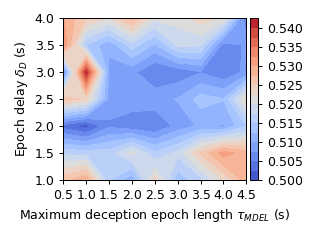

In [126]:
plt.figure(figsize=(3.5,2.625))
plt.contourf(mels, eds, aa, 15, cmap=plt.cm.coolwarm)
plt.xticks(mels, mels)
plt.yticks(eds, eds)
plt.xlabel('Maximum deception epoch length $\\tau_{MDEL}$ (s)')
plt.ylabel('Epoch delay $\\delta_D$ (s)')
cb = plt.colorbar(fraction=0.046, pad=0.02) # label='Validation accuracy' orientation="horizontal",
# plt.colorbar(fraction=0.036, pad=0.02) # label='Validation accuracy'
# cb.ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.show()